<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Project 4: West Nile Virus Prediction

# Contents:

- Notebook Part 1 - Data Cleaning
- Notebook Part 2 - EDA


# Introduction


West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death.

In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today.

Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

Given weather, location, testing, and spraying data, this competition asks you to predict when and where different species of mosquitos will test positive for West Nile virus. A more accurate method of predicting outbreaks of West Nile virus in mosquitos will help the City of Chicago and CPHD more efficiently and effectively allocate resources towards preventing transmission of this potentially deadly virus.

# Problem Statement

Due to the recent epidemic of West Nile Virus in the Windy City, we've had the Department of Public Health set up a surveillance and control system. We're hoping it will let us learn something from the mosquito population as we collect data over time. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive! We need to derive an effective plan to deploy pesticides throughout the city, and that is exactly where you come in!

The goal is of course to build a model and make predictions that the city of Chicago can use when it decides where to spray pesticides! Your team should have a clean Jupyter Notebook that shows your EDA process, your modeling and predictions.

Conduct a cost-benefit analysis. This should include annual cost projections for various levels of pesticide coverage (cost) and the effect of these various levels of pesticide coverage (benefit). (Hint: How would we quantify the benefit of pesticide spraying? To get "maximum benefit," what does that look like and how much does that cost? What if we cover less and therefore get a lower level of benefit?)

# Datasets Used

For the purpose of the analysis, we are provided with the `train`, `test`, `spray` and `weather` datasets. 

The `train` dataset consists of data from 2007, 2009, 2011 and 2013. We will be using this dataset for model building purposes. The `test` dataset consists of data from 2008, 2010, 2012 and 2014. We will be predicting the mosquito population information using this dataset. 

The `spray` dataset consists of Geographic Information Mapping (GIS) data for the spray efforts in 2011 and 2013. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of West Nile virus. 

The `weather` dataset consists of weather conditions of 2007 to 2014, during the months of the tests. It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. 

Please refer to data dictionaries below for the full infomation found in the datasets.

# Importing the neccessary libraries and packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import matplotlib.ticker as ticker
from sklearn.neighbors import KernelDensity

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Load datasets
train = pd.read_csv('../dataset/train_df_cleaned.csv')
test = pd.read_csv('../dataset/test_df_cleaned.csv')
weather = pd.read_csv('../dataset/weather_df_cleaned.csv')
spray = pd.read_csv('../dataset/spray_df_cleaned.csv')

In [4]:
weather1 = weather

In [5]:
weather1.head()

Unnamed: 0  station        date  tmax  tmin  tavg  depart  dewpoint  \
0           0        1  2007-05-01    83    50    67      14        51   
1           1        2  2007-05-01    84    52    68      15        51   
2           2        1  2007-05-02    59    42    51      -3        42   
3           3        2  2007-05-02    60    43    52      -1        42   
4           4        1  2007-05-03    66    46    56       2        40   

   wetbulb  heat  cool  sunrise  sunset codesum  preciptotal  stnpressure  \
0       56     0     2      448    1849                  0.0        29.10   
1       57     0     3      448    1849                  0.0        29.18   
2       47    14     0      447    1850      BR          0.0        29.38   
3       47    13     0      447    1850   BR HZ          0.0        29.44   
4       48     9     0      446    1851                  0.0        29.39   

   sealevel  resultspeed  resultdir  avgspeed  
0     29.82          1.7         27       9.2  
1     29.82          2.7         25       9.6  
2     30.09         13.0          4      13.4  
3     30.08         13.3          2      13.4  
4     30.12         11.7          7      11.9

In [6]:
# Add Year, Month, Week and Day of Week features
weather1['date'] = pd.to_datetime(weather1['date'])
weather1['year'] = weather1['date'].apply(lambda x: x.year)
weather1['month'] = weather1['date'].apply(lambda x: x.month)
weather1['week'] = weather1['date'].apply(lambda x: x.week)
weather1['dayofweek'] = weather1['date'].apply(lambda x: x.dayofweek)

In [7]:
# Drop the 'Unnamed' column
weather1.drop('Unnamed: 0', axis =1, inplace = True)

In [8]:
weather1.head()

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
0        1 2007-05-01    83    50    67      14        51       56     0   
1        2 2007-05-01    84    52    68      15        51       57     0   
2        1 2007-05-02    59    42    51      -3        42       47    14   
3        2 2007-05-02    60    43    52      -1        42       47    13   
4        1 2007-05-03    66    46    56       2        40       48     9   

   cool  sunrise  sunset codesum  preciptotal  stnpressure  sealevel  \
0     2      448    1849                  0.0        29.10     29.82   
1     3      448    1849                  0.0        29.18     29.82   
2     0      447    1850      BR          0.0        29.38     30.09   
3     0      447    1850   BR HZ          0.0        29.44     30.08   
4     0      446    1851                  0.0        29.39     30.12   

   resultspeed  resultdir  avgspeed  year  month  week  dayofweek  
0          1.7         27       9.2  2007      5    18          1  
1          2.7         25       9.6  2007      5    18          1  
2         13.0          4      13.4  2007      5    18          2  
3         13.3          2      13.4  2007      5    18          2  
4         11.7          7      11.9  2007      5    18          3

In [9]:
weather1.to_csv('../dataset/weather_df_cleaned2.csv')

In [10]:
train1 = train

In [11]:
train1.head()

Unnamed: 0        date                                            address  \
0           0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1           1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2           2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3           3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4           4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   nummosquitos  wnvpresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [12]:
# Add Year, Month, Week and Day of Week features
train1['date'] = pd.to_datetime(train1['date'])
train1['year'] = train1['date'].apply(lambda x: x.year)
train1['month'] = train1['date'].apply(lambda x: x.month)
train1['week'] = train1['date'].apply(lambda x: x.week)
train1['dayofweek'] = train1['date'].apply(lambda x: x.dayofweek)

In [13]:
train1['wnvpresent'] = train1['wnvpresent'].map(lambda x : 1 if x > 0 else x)
train1.drop('Unnamed: 0', axis =1, inplace = True)
train1.head()

date                                            address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   nummosquitos  wnvpresent  year  month  week  dayofweek  
0             1           0  2007      5    22          1  
1             1           0  2007      5    22          1  
2             1           0  2007      5    22          1  
3             1           0  2007      5    22          1  
4             4           0  2007      5    22          1

In [14]:
train1.to_csv('../dataset/train_df_cleaned2.csv')

In [92]:
# Add Year, Month, Week and Day of Week features
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].apply(lambda x: x.year)
test['month'] = test['date'].apply(lambda x: x.month)
test['week'] = test['date'].apply(lambda x: x.week)
test['dayofweek'] = test['date'].apply(lambda x: x.dayofweek)
test.drop('Unnamed: 0', axis =1, inplace = True)

In [94]:
test.to_csv('../dataset/test_df_cleaned2.csv')

# EDA

In [15]:
train_weather = pd.merge(weather1, train1, on=['date', 'year', 'week', 'month', 'dayofweek'])

In [91]:
train_weather.to_csv('../dataset/train_weather.csv', index=False)

In [16]:
heatmap_top_35 = train_weather.corr().sort_values("wnvpresent", ascending=False).head(35).index
heatmap_top_35.to_list()

['wnvpresent',
 'nummosquitos',
 'dewpoint',
 'wetbulb',
 'tmin',
 'tavg',
 'sunrise',
 'cool',
 'month',
 'week',
 'tmax',
 'depart',
 'year',
 'latitude',
 'block',
 'dayofweek',
 'preciptotal',
 'addressaccuracy',
 'station',
 'stnpressure',
 'sealevel',
 'sunset',
 'avgspeed',
 'resultdir',
 'resultspeed',
 'longitude',
 'heat']

In [17]:
# Use heatmap to find the correlation
def heatmap(df):
    fix, ax = plt.subplots(figsize=(22,22))

    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(df.corr(), mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
                     square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
                     cbar_kws={"shrink": 0.8}, fmt='.1g',center=0)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    ax.set_title('Correlation Heatmap for Merged Data', fontsize=22);

/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1105615090.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


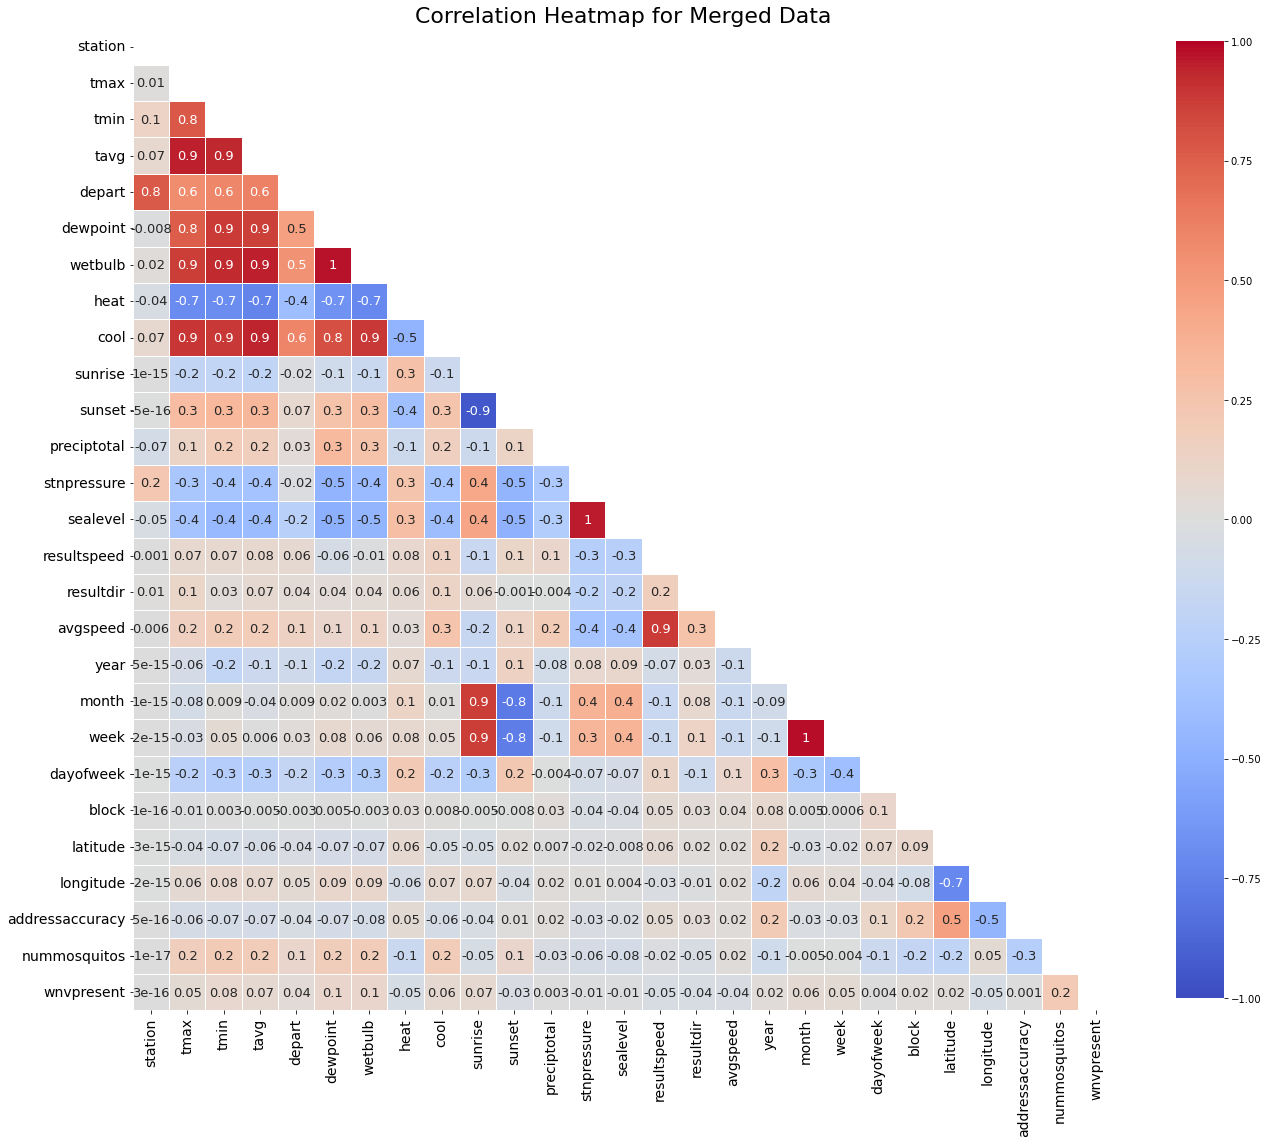

In [18]:
heatmap(train_weather)

In [20]:
train_weather.corr().sort_values("wnvpresent", ascending=False)['wnvpresent'].head(55)

wnvpresent         1.000000e+00
nummosquitos       2.065902e-01
dewpoint           1.009435e-01
wetbulb            9.579567e-02
tmin               7.949813e-02
tavg               6.940568e-02
sunrise            6.737261e-02
cool               6.415217e-02
month              5.936746e-02
week               5.340049e-02
tmax               5.176035e-02
depart             3.758074e-02
year               2.354226e-02
latitude           1.877270e-02
block              1.578555e-02
dayofweek          3.819316e-03
preciptotal        3.428698e-03
addressaccuracy    1.052623e-03
station            3.493560e-16
stnpressure       -1.076774e-02
sealevel          -1.194527e-02
sunset            -3.233464e-02
avgspeed          -3.876498e-02
resultdir         -4.016196e-02
resultspeed       -4.600508e-02
longitude         -4.872509e-02
heat              -5.406878e-02
Name: wnvpresent, dtype: float64

Observsation:

Mosquito Species Count

In [21]:
species_df = train1[["species", "nummosquitos", "wnvpresent"]].groupby("species").sum()
species_df["% wnvpresent"] = (species_df["wnvpresent"] / species_df["nummosquitos"]) * 100
species_df

nummosquitos  wnvpresent  % wnvpresent
species                                                       
CULEX ERRATICUS                    7           0      0.000000
CULEX PIPIENS                  44671         240      0.537261
CULEX PIPIENS/RESTUANS         66268         262      0.395364
CULEX RESTUANS                 23431          49      0.209125
CULEX SALINARIUS                 145           0      0.000000
CULEX TARSALIS                     7           0      0.000000
CULEX TERRITANS                  510           0      0.000000

In [22]:
species_df['nummosquitos']

species
CULEX ERRATICUS               7
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
CULEX RESTUANS            23431
CULEX SALINARIUS            145
CULEX TARSALIS                7
CULEX TERRITANS             510
Name: nummosquitos, dtype: int64

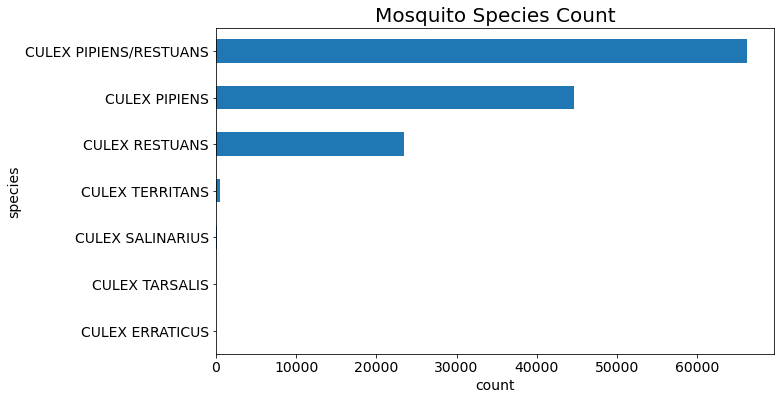

In [23]:
plt.figure(figsize=(10,6))

species_df['nummosquitos'].sort_values(ascending=True).plot(kind='barh')
plt.xlabel("count", fontsize=14)
plt.ylabel("species", fontsize=14)
plt.tick_params(labelsize=14)
plt.title("Mosquito Species Count", fontsize=20);

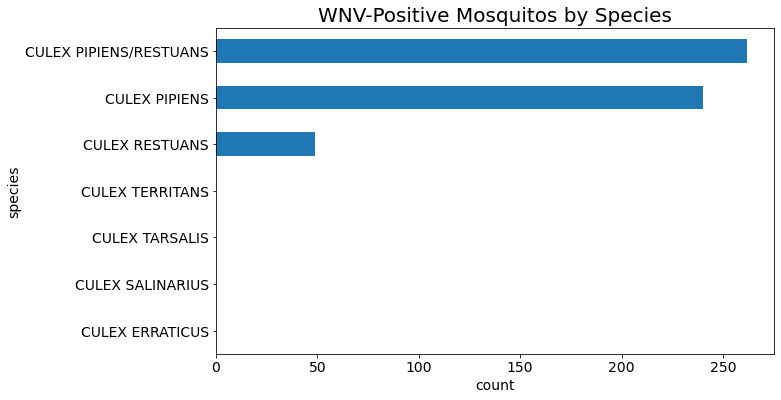

In [24]:
plt.figure(figsize=(10,6))

species_df['wnvpresent'].sort_values(ascending=True).plot(kind='barh')
plt.xlabel("count", fontsize=14)
plt.ylabel("species", fontsize=14)
plt.tick_params(labelsize=14)
plt.title("WNV-Positive Mosquitos by Species", fontsize=20);

                        nummosquitos  wnvpresent
species                                         
CULEX ERRATICUS                    7           0
CULEX PIPIENS                  44671         240
CULEX PIPIENS/RESTUANS         66268         262
CULEX RESTUANS                 23431          49
CULEX SALINARIUS                 145           0
CULEX TARSALIS                     7           0
CULEX TERRITANS                  510           0


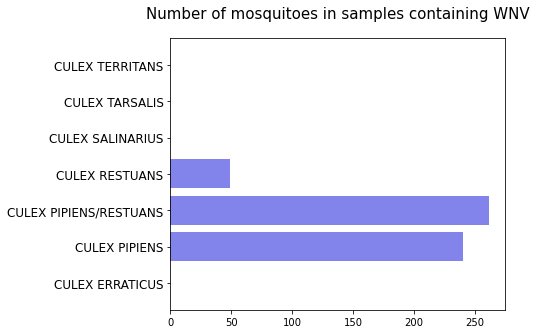

In [25]:
mos_wnv = train1[['species', 'nummosquitos', 'wnvpresent']].groupby(by='species').sum()
print(mos_wnv)

# Reset the index after groupby
mos_wnv.reset_index(inplace=True)

plt.figure(figsize=(6,5))
plt.barh(mos_wnv['species'], mos_wnv['wnvpresent'], color='#8383EC')
plt.title('Number of mosquitoes in samples containing WNV', fontsize=15, y=1.05)
plt.yticks(fontsize=12)
plt.show()

From the above 3 plots, we see that although we have 7 species of mosquitoes listed, but only 3 of them carry the West Nile Virus (WNV) - namely Culex Pipiens/Restuans, Culex Pipiens and Culex Restuans. Incidentally, these were also the species which had the highest mosquito count by numbers.

The remaining 4 species were present in much smaller numbers (510 or less). Given that the WNV is present in 0.21% - 0.54% of mosquitoes (1 in at least 500 mosquitoes), it does make sense that these species had 0 counts of WNV-carrying mosquitoes.

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


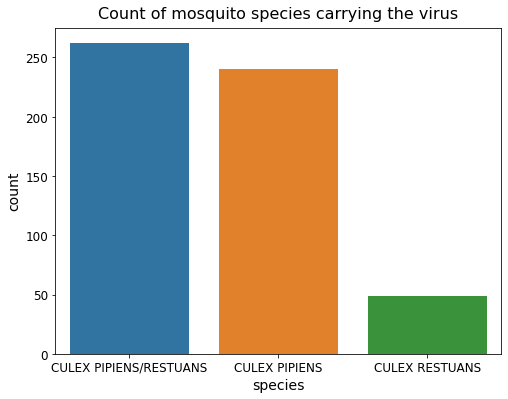

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(train1[train1['wnvpresent']==1]['species'])
plt.title('Count of mosquito species carrying the virus', fontsize=16, y=1.01)
plt.tick_params(labelsize=12)
plt.xlabel('species', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

In [27]:
# Percentage of mosquitoes with WNV 
(species_df['wnvpresent'].sum()/species_df['nummosquitos'].sum()) * 100

0.40803027273602444

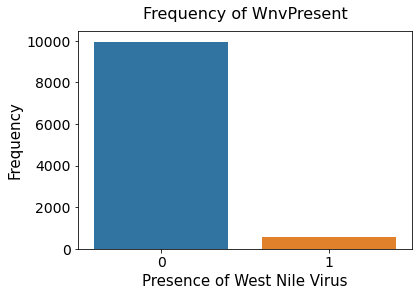

In [28]:
sns.barplot(x=[0,1], y=train1['wnvpresent'].value_counts())
plt.xlabel('Presence of West Nile Virus', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(labelsize=14)
plt.title('Frequency of WnvPresent',fontsize=16, y=1.03)
plt.show()

With only 0.41% of the total mosquitoes carrying the WNV, we do note that our classes are imbalanced which will be taken care of before modelling is done.

In [31]:
train1['wnvpresent'].groupby(train1['year']).sum()

year
2007    236
2009     19
2011     57
2013    239
Name: wnvpresent, dtype: int64

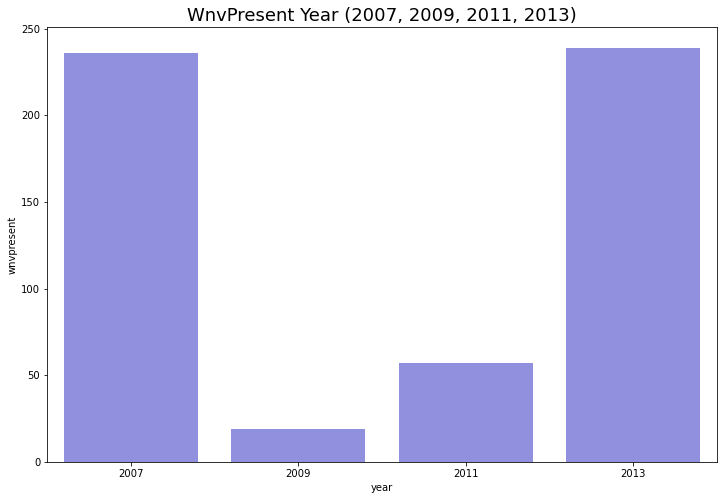

In [32]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.barplot(data=train1.groupby(by='year').sum().reset_index(), x='year', y='wnvpresent', color='#8383EC', ax=ax)
plt.title('WnvPresent Year (2007, 2009, 2011, 2013)', fontsize=18);

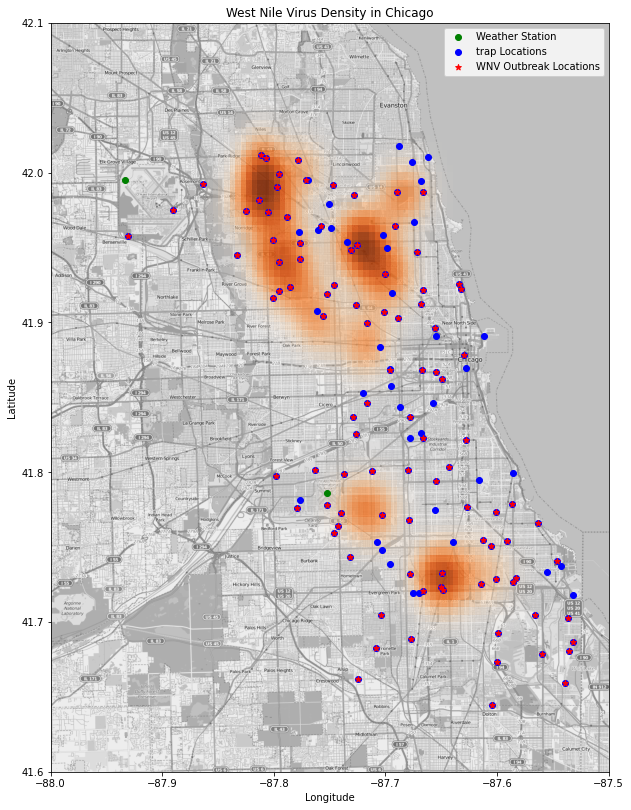

In [35]:
alpha_cm = plt.cm.Oranges
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
mapdata = np.loadtxt("../dataset/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)

# Traps where only WNV is present
X = spray[['longitude', 'latitude']].drop_duplicates().values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# Kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

# Weather Station locations
plt.scatter(x = (-87.933, -87.752), y = (41.995, 41.786), marker='o', color='g', label='Weather Station')

# Trap locations
trap_locations = train1[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='o', c='b', label='trap Locations')

# WNV outbreak locations
wnv_locations = train1[train1['wnvpresent'] != 0][['longitude', 'latitude']].drop_duplicates().values
plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='*', c='r', label='WNV Outbreak Locations')

plt.title('West Nile Virus Density in Chicago')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('heatmap.png')

We desired a clearer visual representation of the geographic information our data was providing. Weather station locations are indicated by green circles, mosquito trap placement is indicated by blue circles, the WNV outbreak is indicated by red stars, and spraying regions are indicated by orange markings. Greater spray concentration area is shown by darker orange, while decreased spray concentration area is indicated by lighter red.


We can see from the map that all the traps are fairly dispersed, but the spray didn't cover the majority of the WNV outbreak area. There must be a purpose for this, so let's see if any other illustrations might clarify it.

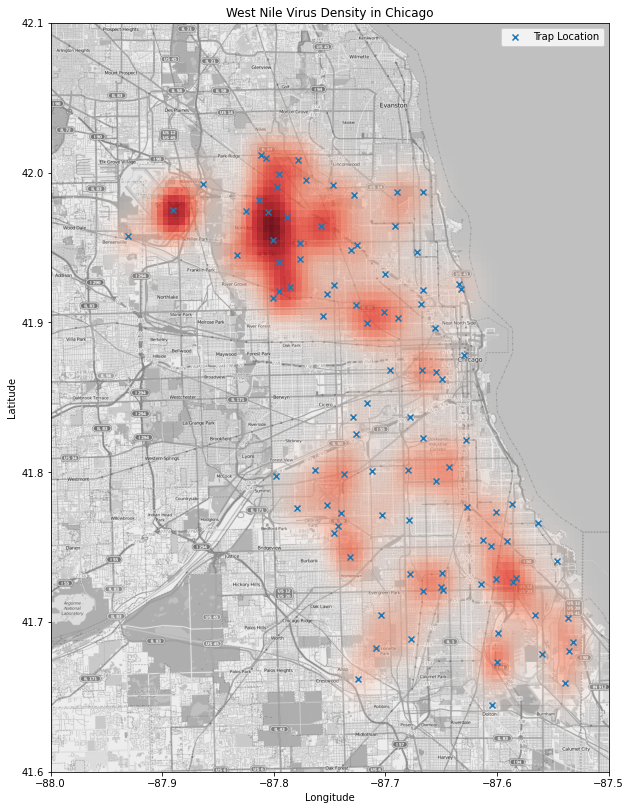

In [36]:
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)

# Traps where only WNV is present
wnv = train1[train1['wnvpresent'] == 1]
wnv = wnv.groupby(['date', 'trap','longitude', 'latitude']).max()['wnvpresent'].reset_index()
X = wnv[['longitude', 'latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# Kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

# Trap locations
locations = wnv[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x', label='Trap Location')


plt.title('West Nile Virus Density in Chicago')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('heatmap.png')

This map aids in locating the concentration of WNV-carrying mosquito traps. Areas with darker red indicate areas with higher densities of WNV-carrying mosquitoes, whereas areas with lighter red suggest areas with lower densities of the virus. 

The map aids in identifying which regions receive more priority for anti-WNV spraying.

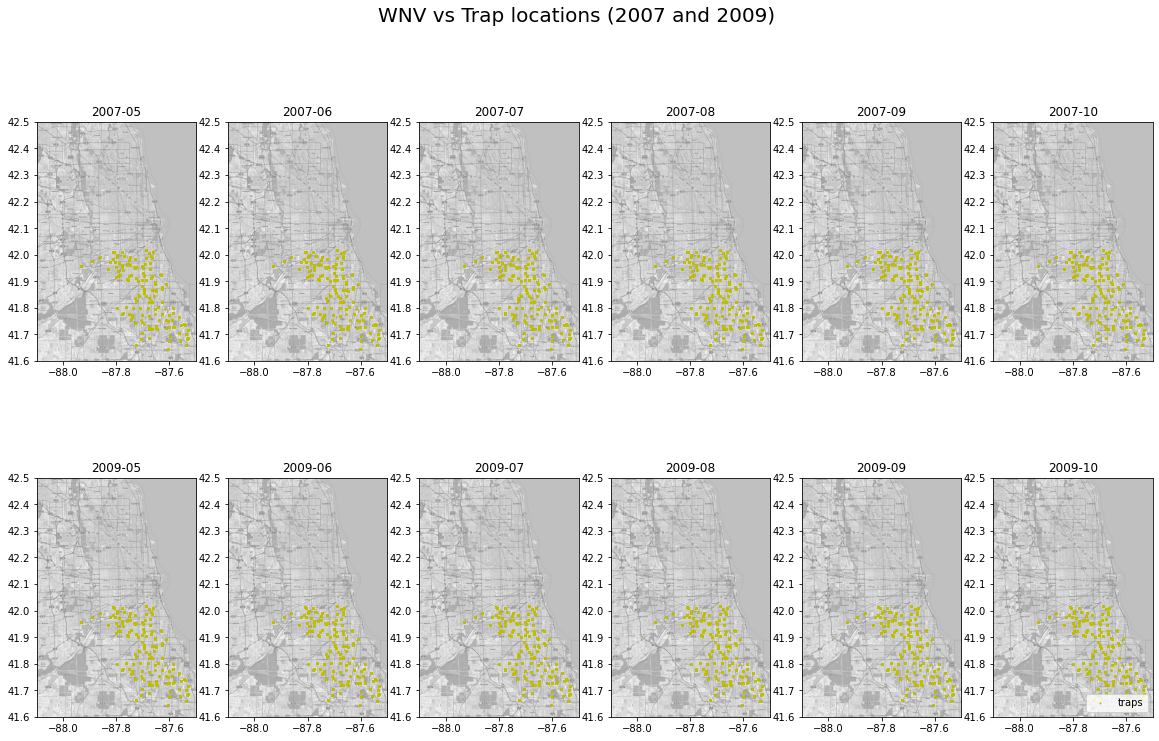

In [38]:
# Plot locations of WNV versus trap locations
origin = [41.6, -88.1]              # lat/long of origin (lower left corner)
upperRight = [42.5, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("../dataset/mapdata_copyright_openstreetmap_contributors.txt")

# Train dates
dates_07_09 = ['2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10',
               '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10']

# Generate plots
plt.figure(figsize=(20,12))
for i in range(len(dates_07_09)):
    plt.subplot(2,6,i+1)
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=train1['longitude'],
                y=train1['latitude'], c='y', s=1, label='traps')
    plt.title(dates_07_09[i])
    
    try:
        plt.scatter(x=train1.loc[train1['wnvpresent'] >= 1][dates_07_09[i]]['longitude'],
                    y=train1.loc[train1['wnvpresent'] >= 1][dates_07_09[i]]['latitude'], c='r', s=1, label='wnvpresent')
    except:
        None

plt.suptitle('WNV vs Trap locations (2007 and 2009)', fontsize=20)
plt.legend(loc='lower right');

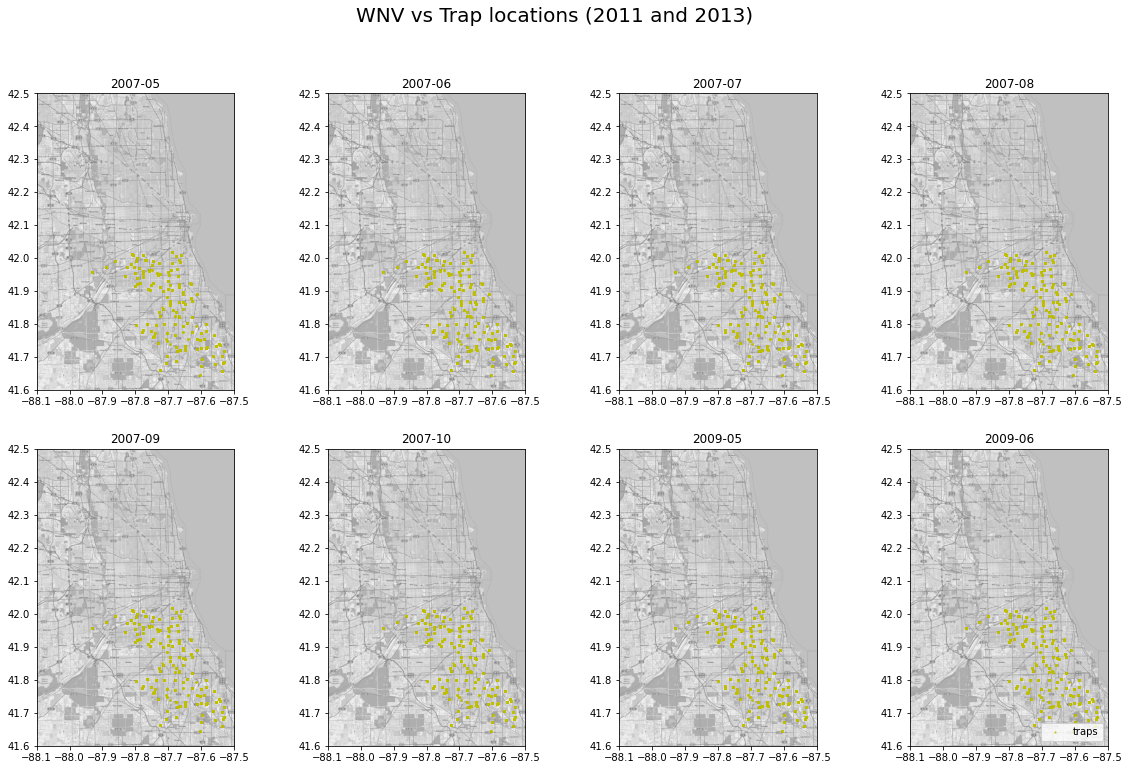

In [40]:
dates_11_13 = ['2011-06', '2011-07', '2011-08', '2011-09',
               '2013-06', '2013-07', '2013-08', '2013-09']

# Generate plots
plt.figure(figsize=(20,12))
for i in range(len(dates_11_13)):
    plt.subplot(2,4,i+1)
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=train1['longitude'],
                y=train1['latitude'], c='y', s=1, label='traps')
    plt.title(dates_07_09[i])
    
    try:
        plt.scatter(x=train1.loc[train1['wnvpresent'] >= 1][dates_11_13[i]]['longitude'],
                    y=train1.loc[train1['wnvpresent'] >= 1][dates_11_13[i]]['latitude'], c='r', s=1, label='wnvpresent')
    except:
        None

plt.suptitle('WNV vs Trap locations (2011 and 2013)', fontsize=20)
plt.legend(loc='lower right');

The following parts will only take these 4 years into consideration because the dataset only includes data for the years 2007, 2009, 2011, and 2013.


This section examines the primary climatic characteristics that earlier scientific study determined to have an effect on WNV transmissions.


We discovered that in these 5 plots, the rolling 14-day average with various lags for the various attributes provided the most insightful information.

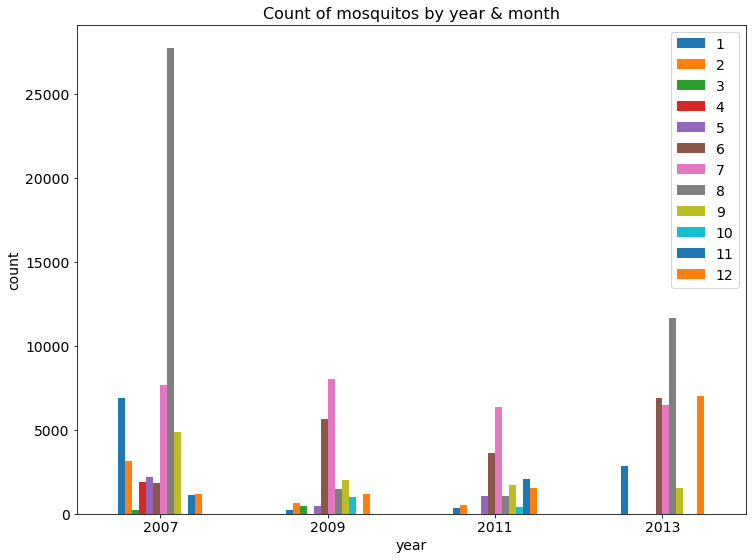

In [42]:
train1.groupby(['year','month'])['nummosquitos'].sum().unstack().plot.bar(figsize=(12,9))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of mosquitos by year & month', fontsize=16)
plt.ylabel('count', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.legend(fontsize=14)
plt.show()

We now want to determine how some features relate to the presence of WNV.

Text(25.92402343750001, 0.5, 'Dew Point Temperature')

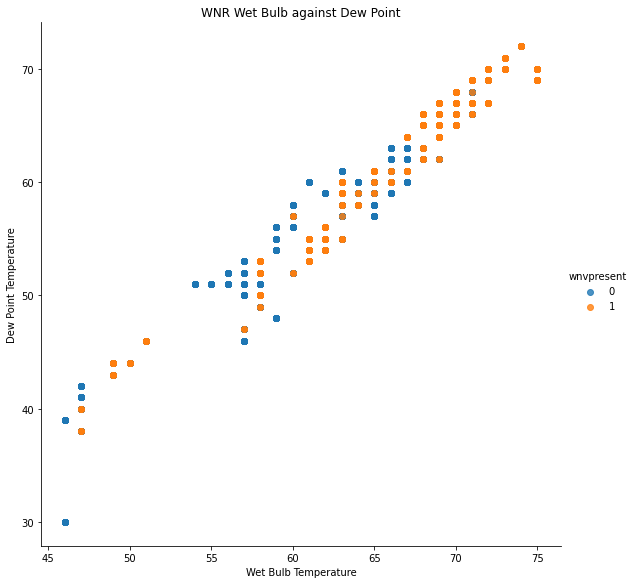

In [45]:
sns.lmplot( x='wetbulb', y='dewpoint', data=train_weather, fit_reg=False, hue='wnvpresent', height=8)
plt.title('WNR Wet Bulb against Dew Point')
plt.xlabel('Wet Bulb Temperature')
plt.ylabel('Dew Point Temperature')

There seem to be more Mosquitos with West Nile Virus detected during days with higher humidity. 


With this knowledge, we are interested to investigate if West Nile Virus is discovered more frequently on days when the dew point temperature is greater.

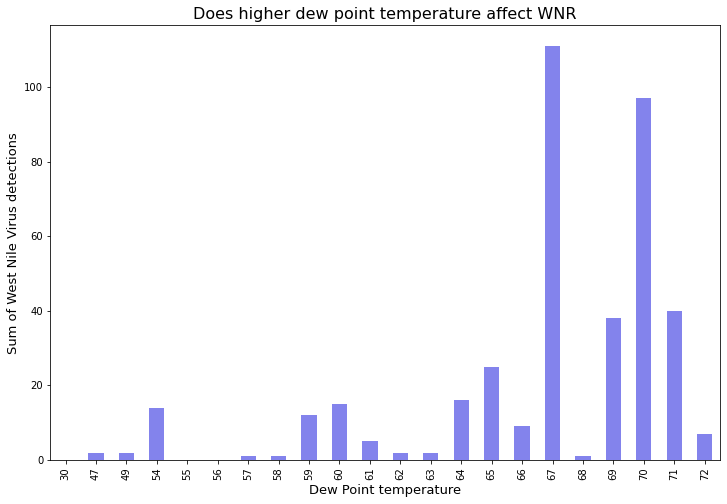

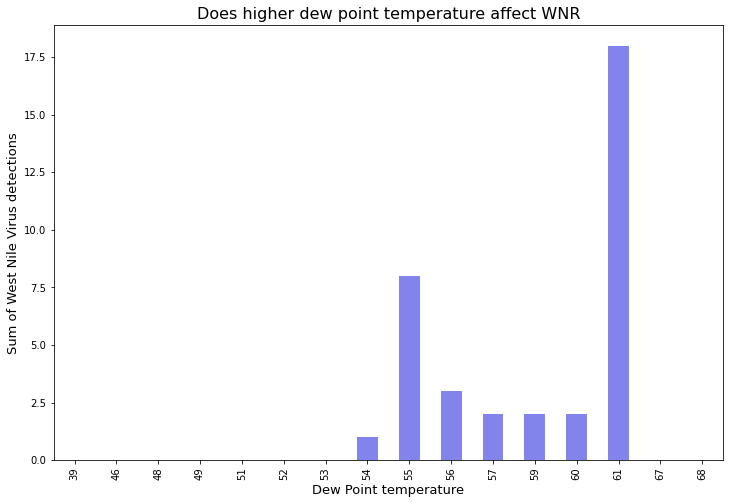

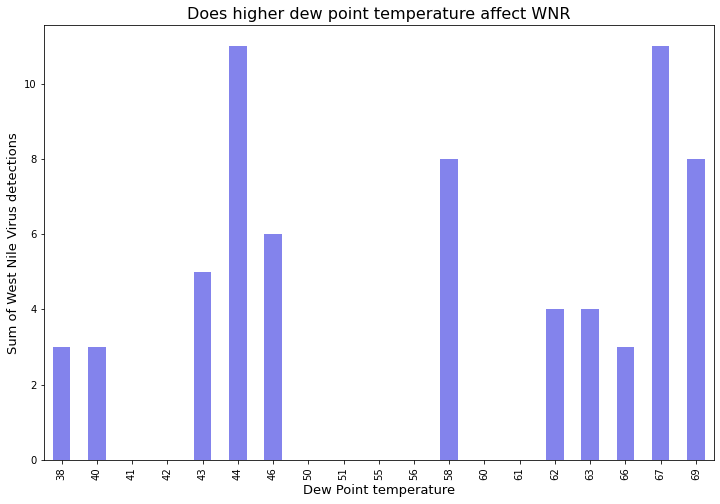

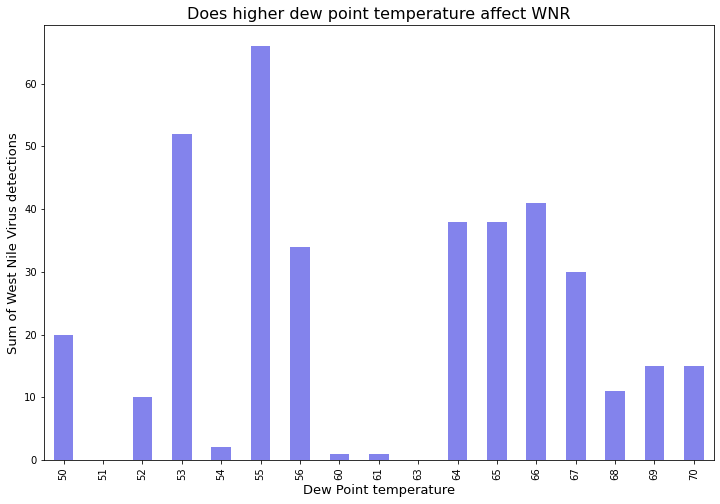

In [47]:
for x in train_weather['year'].unique():
    plt.figure(figsize=(12,8))
    train_weather[train_weather['year']==x].groupby(['dewpoint'])['wnvpresent'].sum().plot.bar(color='#8383EC') 
    plt.title("Does higher dew point temperature affect WNR", fontsize=16)
    plt.xlabel("Dew Point temperature", fontsize =13)
    plt.xticks(rotation=90)
    plt.ylabel("Sum of West Nile Virus detections", fontsize=13)

The three graphs above show that the West Nile Virus (WNV) increases when the dew point temperature rises, indicating that higher dew point temperatures do cause the WNV.

So, we now want to examine the impact of wet bulb temperature.

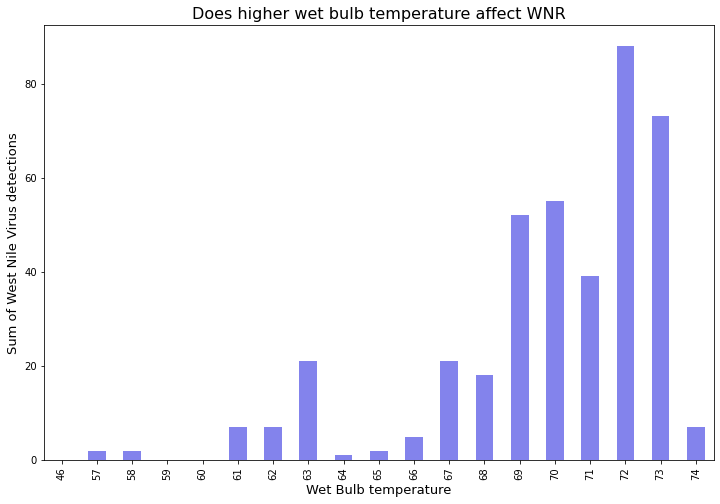

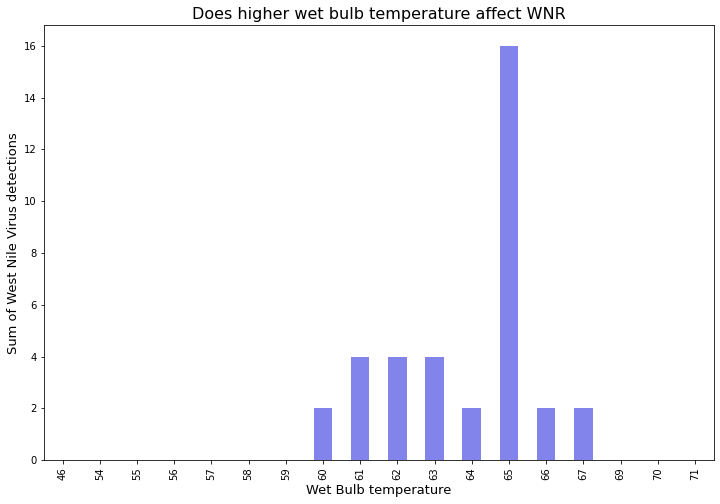

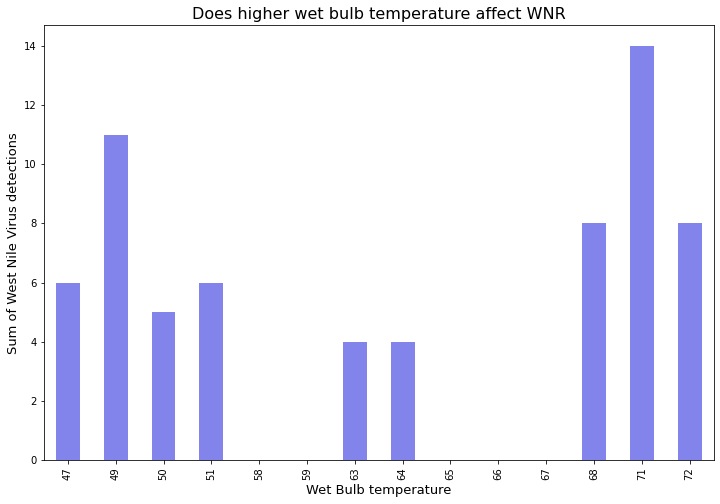

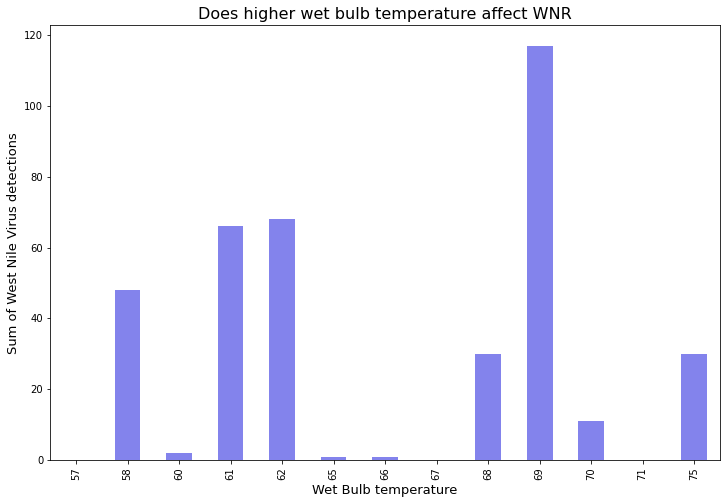

In [48]:
for x in train_weather['year'].unique():
    plt.figure(figsize=(12,8))
    train_weather[train_weather['year']==x].groupby(['wetbulb'])['wnvpresent'].sum().plot.bar(color='#8383EC') 
    plt.title("Does higher wet bulb temperature affect WNR", fontsize=16)
    plt.xlabel("Wet Bulb temperature", fontsize =13)
    plt.xticks(rotation=90)
    plt.ylabel("Sum of West Nile Virus detections", fontsize=13)

The three graphs above demonstrate that the West Nile Virus (WNV) increases when the wet bulb temperature rises, similar to how the dew point temperature does. This suggests that higher wet bulb temperatures do in fact cause the WNV.

In [49]:
def twin_plot(fea1, fea2):
    for x in train_weather['year'].unique():
        fig, ax1 = plt.subplots(figsize=(12,6))

        sns.lineplot(x=train_weather[train_weather['year']==x]['date'], y=train_weather[train_weather['year']==x][fea1],
                     ci=None, color='#8383EC', label=f'{fea1}', ax=ax1)
        ax1.set_xlabel('date', fontsize=13)
        ax1.set_ylabel(f'{fea1}', fontsize=13, color='#8383EC')
        ax1.legend(loc=2)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);

        new = train_weather[train_weather['year']==x].groupby(['date'])[fea2].sum()
        df_new = pd.DataFrame(new)

        ax2 = ax1.twinx()
        sns.lineplot(x=df_new.index, y=df_new[fea2],
                     ci=None, color='r', label=f'{fea2}', ax=ax2)
        ax2.set_ylabel(f'{fea2}', fontsize=13, color='r')
        ax2.legend(loc=1)

        plt.title(f'{fea1} and {fea2} in {x}')

        fig.tight_layout()

/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);


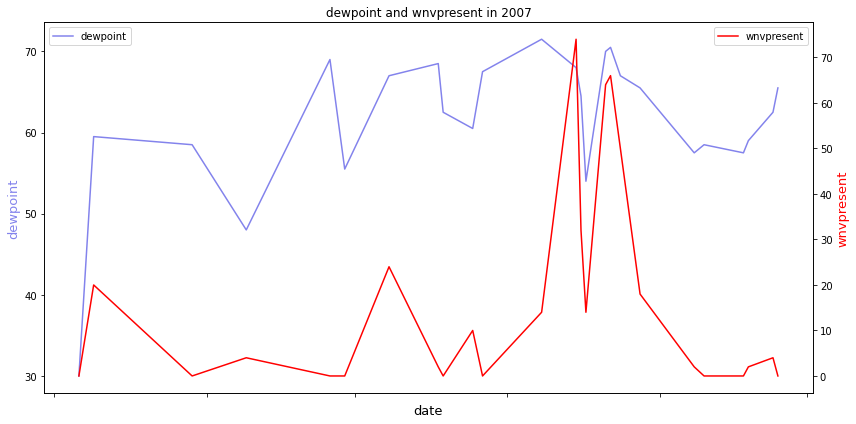

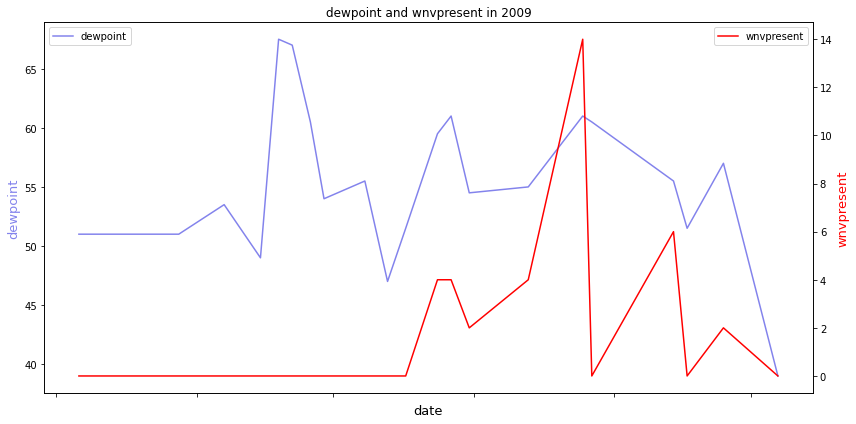

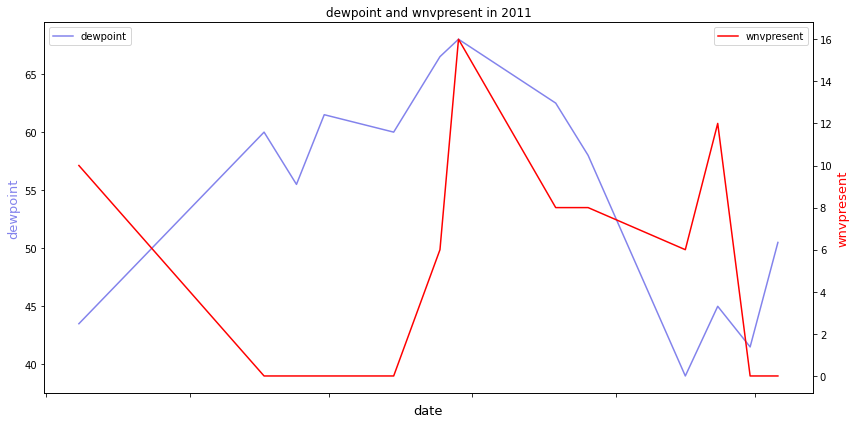

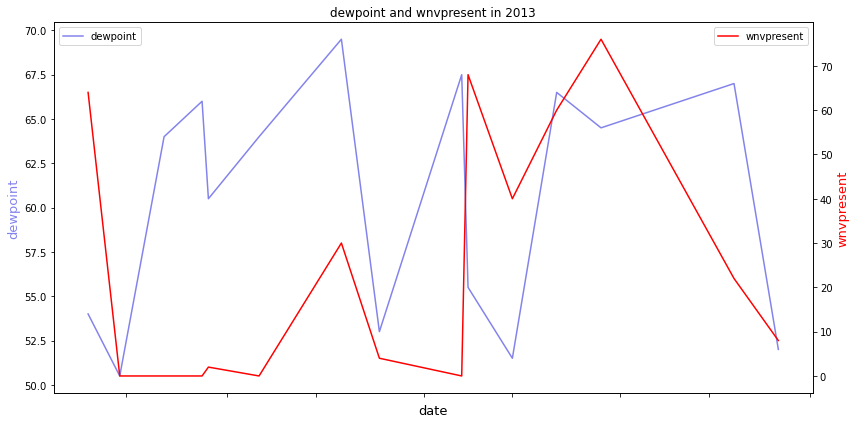

In [50]:
twin_plot('dewpoint','wnvpresent')

/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);


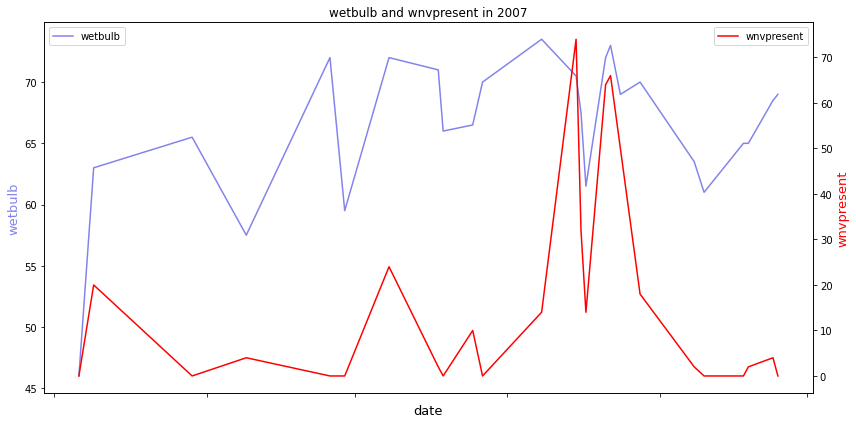

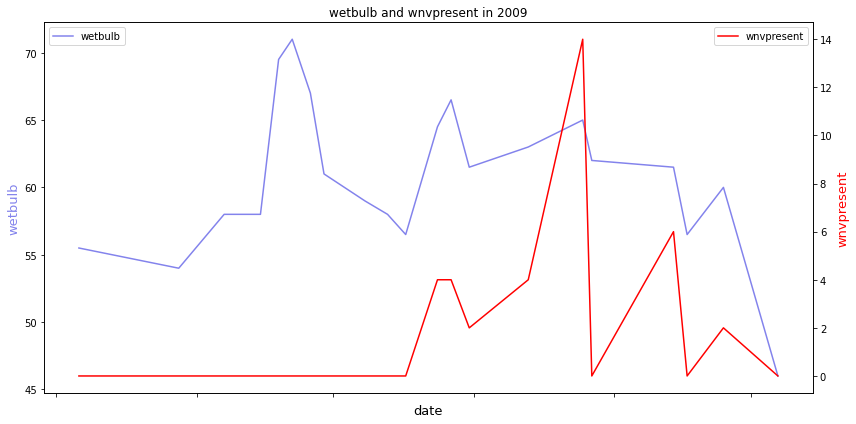

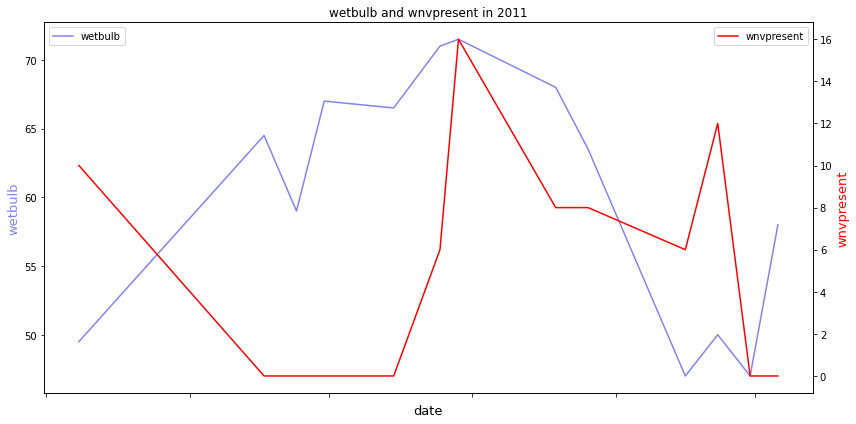

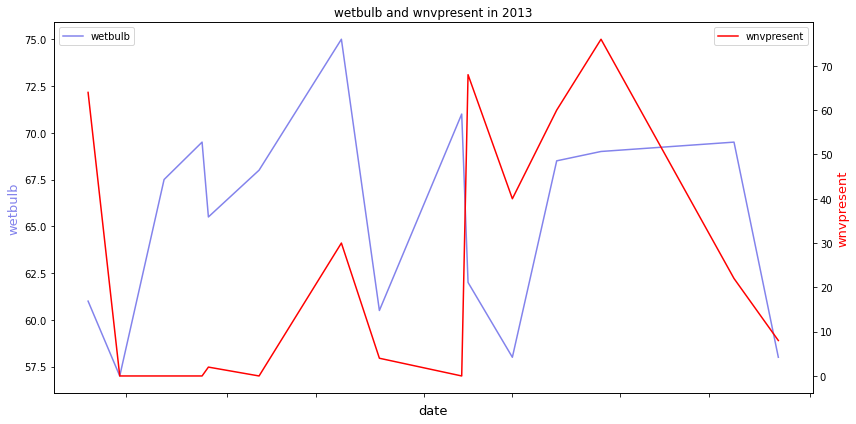

In [51]:
twin_plot('wetbulb','wnvpresent')

# Relationship between wet bulb, dew point temperatures agaisnt WNR:


# Dew Point Temperature:

Dew Point - The dew point is the temperature at which water vapor can no longer condense in the air. Therefore, if the air is cooling at a higher temperature, it suggests that there is already enough moisture present and that just a very small amount of cooling is required for it to begin condensing into water vapor.

The following plots show that the dew point typically peaks between July and September. Higher WNV counts do, in general, follow higher dew points. We do, however, point out that in 2007 and 2013, the maxima did not coincide with the days that had the highest WNV numbers.

It's possible that fewer mosquitoes were active on those days because of the cooler temperatures.


# Wet Bulb Temperature:

Wet Bulb - The similar is true of Wet Bulb. If the Wet Bulb temperature is much lower, the air was likely quite dry earlier, and vice versa.

The wet bulb often peaks between July and September, according to the charts above. Wet bulb temperatures that are higher are typically accompanied by increased humidity levels, which counteract the higher temperatures and lead to higher WNV numbers. We do, however, point out that in 2007 and 2013, the maxima did not coincide with the days that had the highest WNV numbers.

It's possible that fewer mosquitoes were active on those days because of the cooler temperatures.


Based on the above observations we could say that lower the temperature variance from the Tavg more is the humidity already present in the atmosphere.

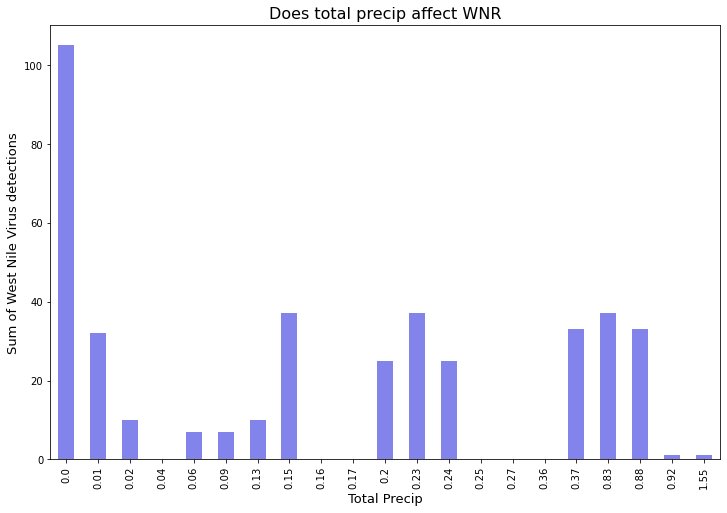

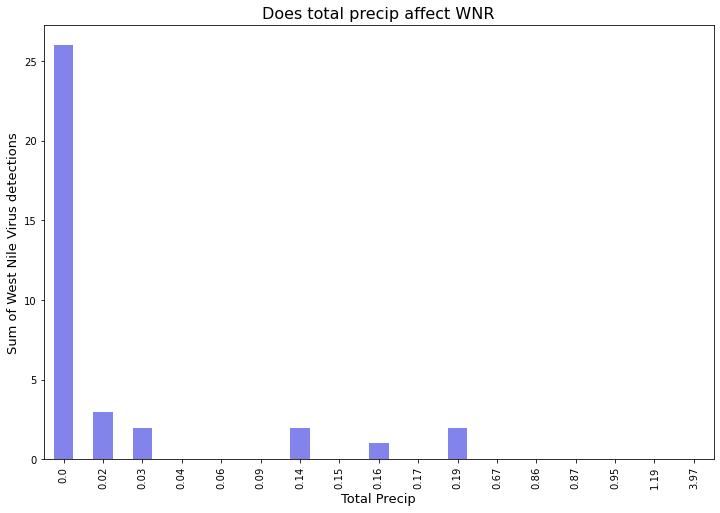

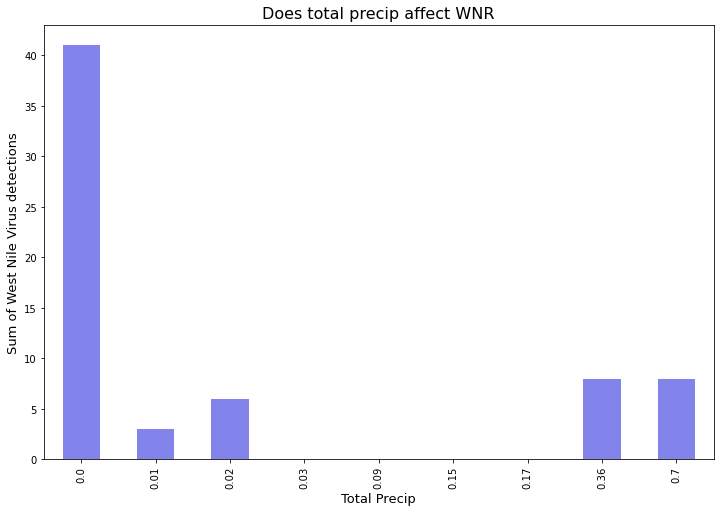

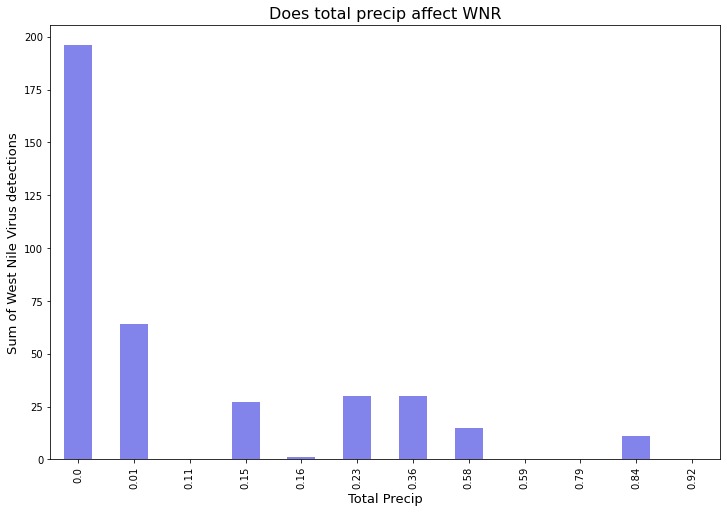

In [52]:
for x in train_weather['year'].unique():
    plt.figure(figsize=(12,8))
    train_weather[train_weather['year']==x].groupby(['preciptotal'])['wnvpresent'].sum().plot.bar(color='#8383EC') 
    plt.title("Does total precip affect WNR", fontsize=16)
    plt.xlabel("Total Precip", fontsize =13)
    plt.xticks(rotation=90)
    plt.ylabel("Sum of West Nile Virus detections", fontsize=13)

/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);


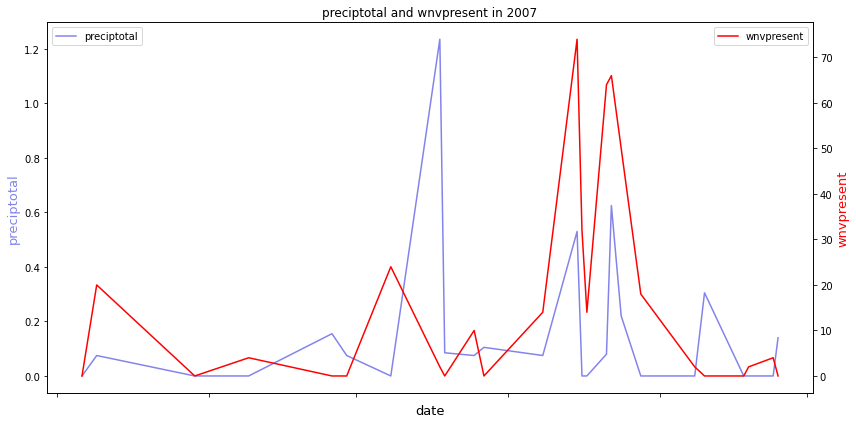

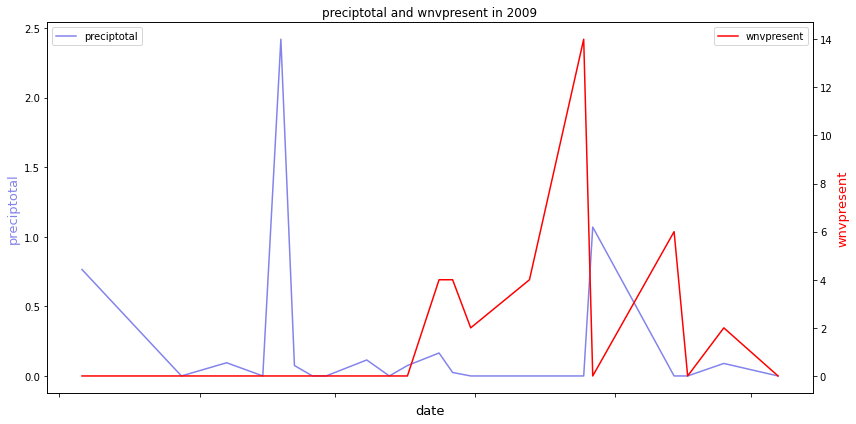

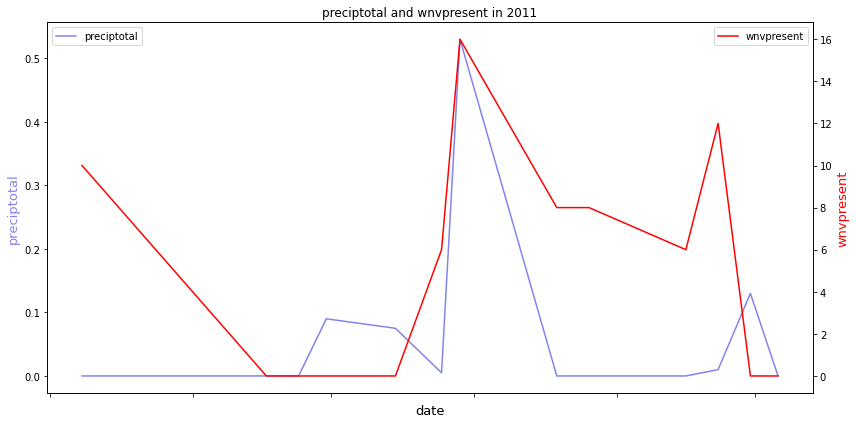

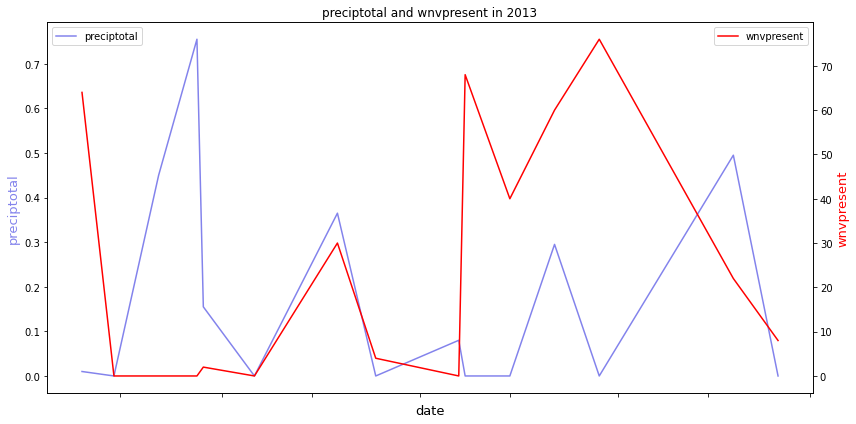

In [53]:
twin_plot('preciptotal','wnvpresent')

# Relationship between total precipitation and WNR:

The aforementioned figures show delay between the amount of precipitation and the number of WNV-positive cases. Precipitation totals that are declining or legal typically correspond to a rise in the WNV count.

According to results from a different study, more water surfaces mean more opportunities for mosquito breeding. The increases in WNV-positive numbers after periods of heavy precipitation, as seen in the years 2009, 2011, and 2013, help to explain this.

Link to article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/


Now, let us see if the timings of Sunrise and Sunset seem to be of any use to us.

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

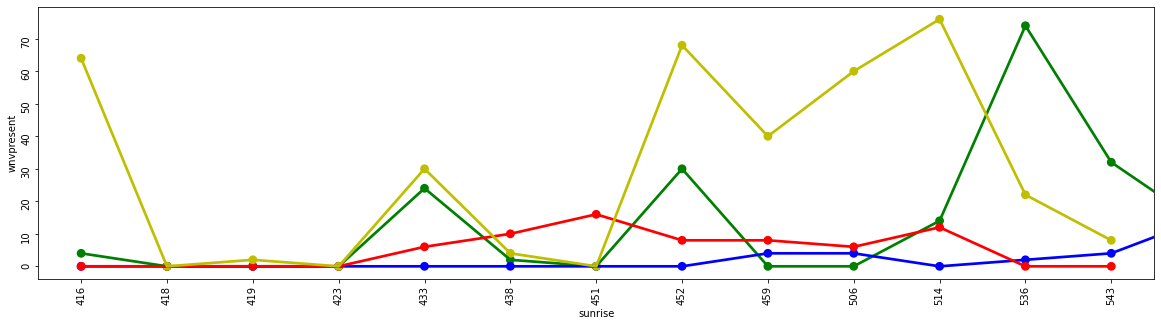

In [84]:
plt.figure(figsize=(20,5))
tmp = train_weather.groupby(['year','sunrise'])['wnvpresent'].sum().reset_index()
sns.pointplot(tmp.loc[tmp['year']==2007,'sunrise'],tmp['wnvpresent'],color='g')
sns.pointplot(tmp.loc[tmp['year']==2009,'sunrise'],tmp['wnvpresent'],color='b')
sns.pointplot(tmp.loc[tmp['year']==2011,'sunrise'],tmp['wnvpresent'],color='r')
sns.pointplot(tmp.loc[tmp['year']==2013,'sunrise'],tmp['wnvpresent'],color='y')
plt.tick_params(rotation=90)
plt.show()

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

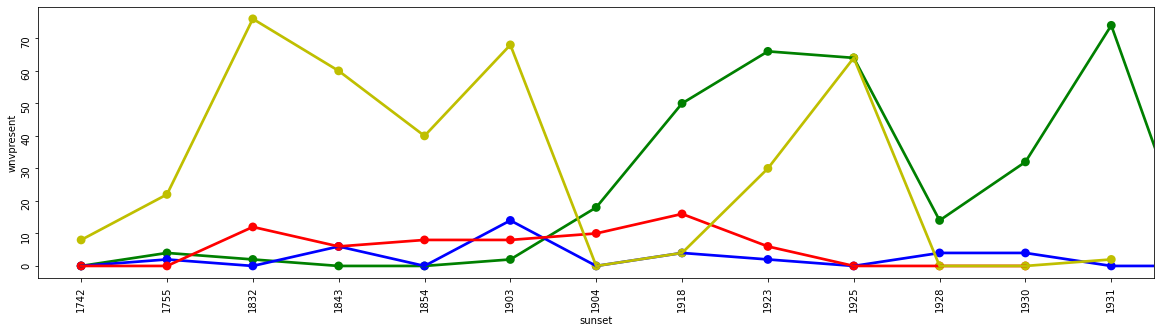

In [85]:
plt.figure(figsize=(20,5))
tmp = train_weather.groupby(['year','sunset'])['wnvpresent'].sum().reset_index()
sns.pointplot(tmp.loc[tmp['year']==2007,'sunset'],tmp['wnvpresent'],color='g')
sns.pointplot(tmp.loc[tmp['year']==2009,'sunset'],tmp['wnvpresent'],color='b')
sns.pointplot(tmp.loc[tmp['year']==2011,'sunset'],tmp['wnvpresent'],color='r')
sns.pointplot(tmp.loc[tmp['year']==2013,'sunset'],tmp['wnvpresent'],color='y')
plt.tick_params(rotation=90)
plt.show()

# Relationship between Sunrise, Sunset and WNR:

The Sunrise and Sunset Feature does not show any discernible pattern that is connected to the presence of WNV-carrying mosquitoes. As a result, we might need to reconsider this feature when modeling it or think of some practical feature generation techniques.

Now we will take a look if there is any effect of WNR when it comes to Wind speed.

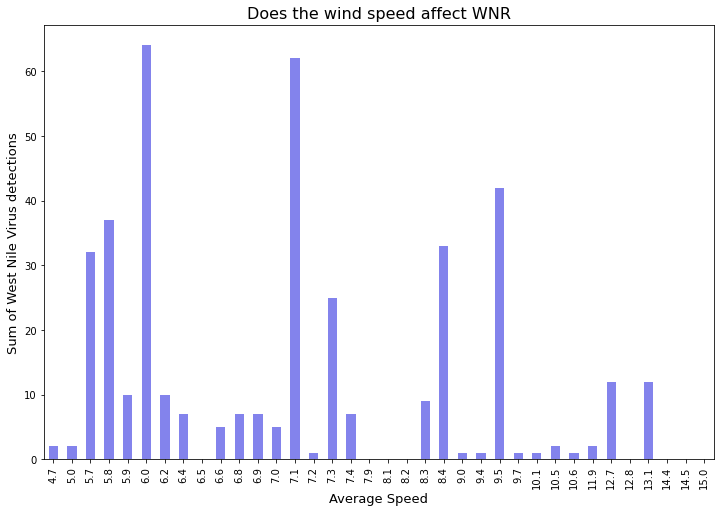

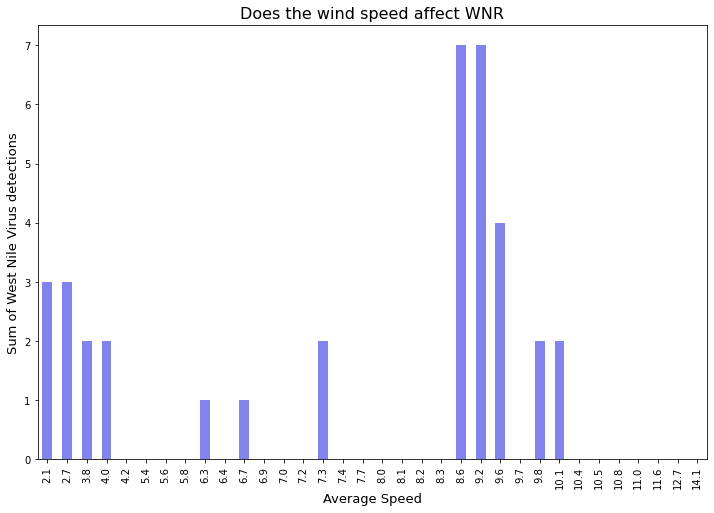

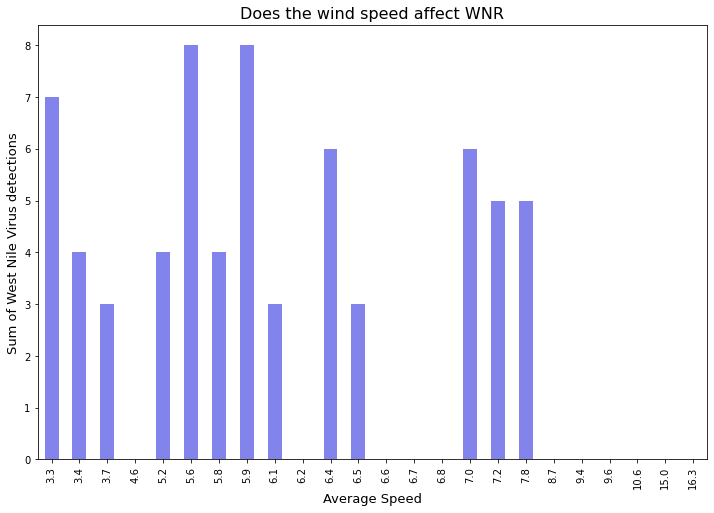

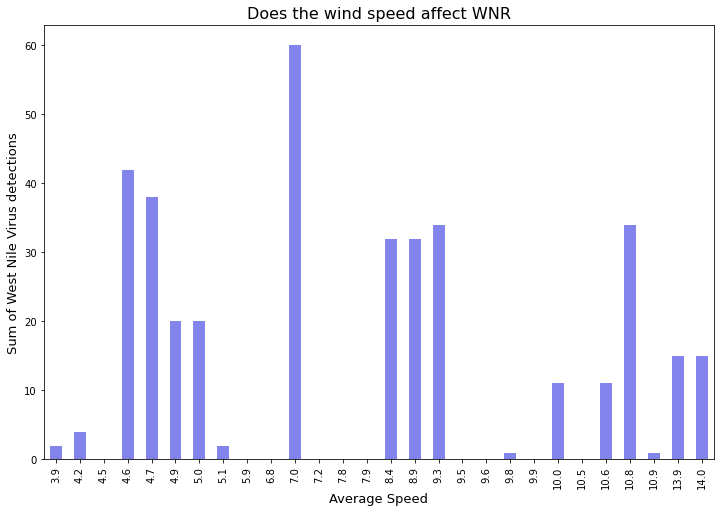

In [54]:
for x in train_weather['year'].unique():
    plt.figure(figsize=(12,8))
    train_weather[train_weather['year']==x].groupby(['avgspeed'])['wnvpresent'].sum().plot.bar(color='#8383EC') 
    plt.title("Does the wind speed affect WNR", fontsize=16)
    plt.xlabel("Average Speed", fontsize =13)
    plt.xticks(rotation=90)
    plt.ylabel("Sum of West Nile Virus detections", fontsize=13)

/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);


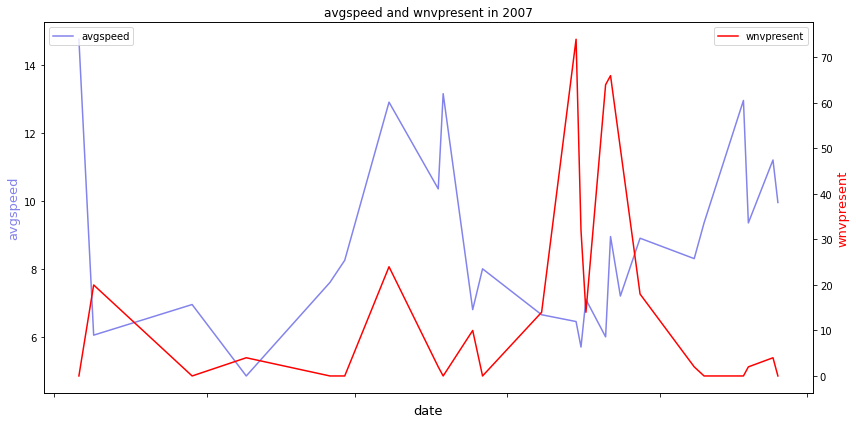

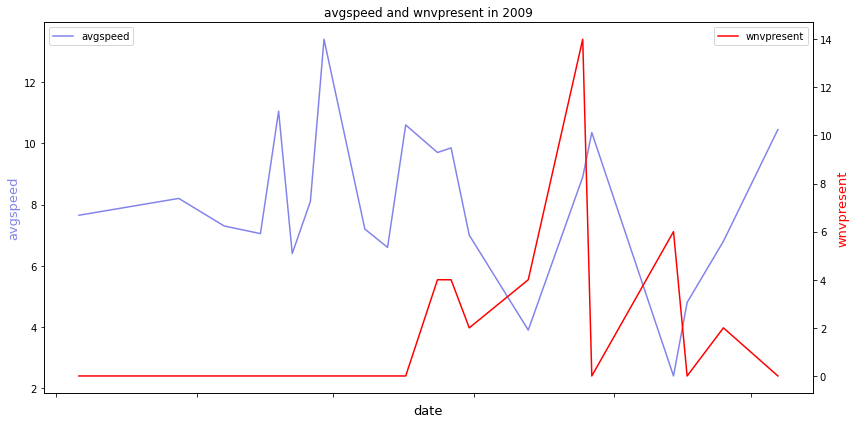

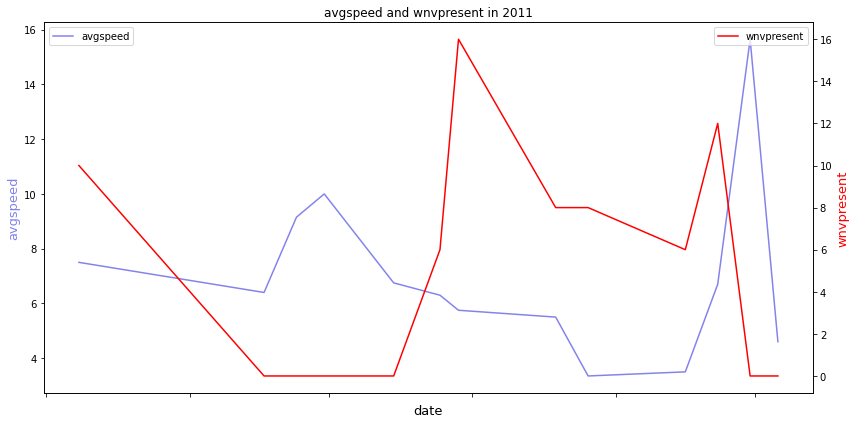

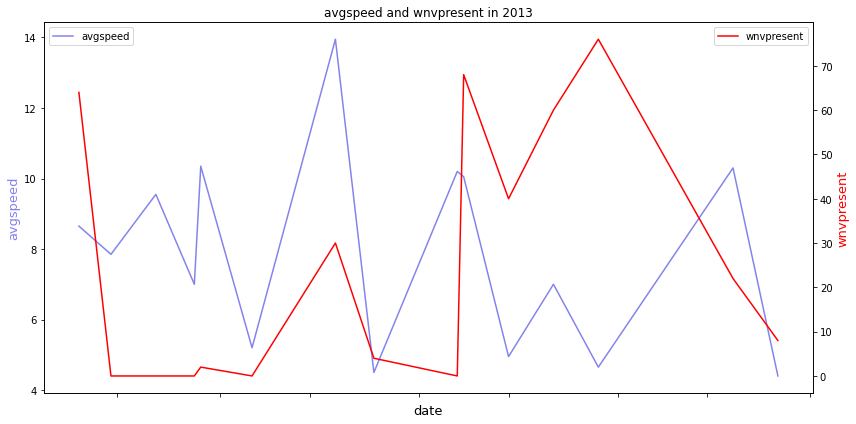

In [55]:
twin_plot('avgspeed','wnvpresent')

# Relationship between wind average speed against WNR:

Since the impact of average wind speeds is immediate, we did not add the rolling average or time lags.

A greater number of WNV-positive mosquitoes are being found at lower average wind speeds. Since wind can be exploited by mosquitoes as a means of travel, wind patterns have been suggested as a potential factor in the spread of the WNV. Therefore, it is likely that fewer mosquitoes are identified at greater wind speeds, and that traps only pick up mosquitoes at lower wind speeds.

Text(25.924023437500004, 0.5, 'Maximum Temperature')

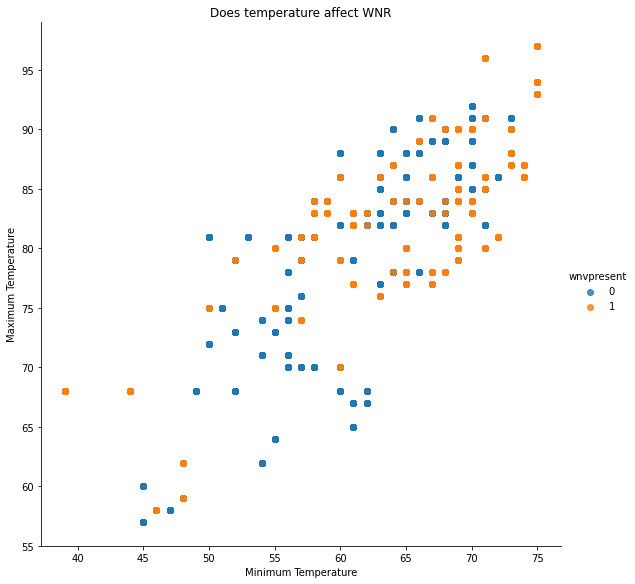

In [56]:
sns.lmplot( x='tmin', y='tmax', data=train_weather, fit_reg=False, hue='wnvpresent', height=8)
plt.title('Does temperature affect WNR')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')

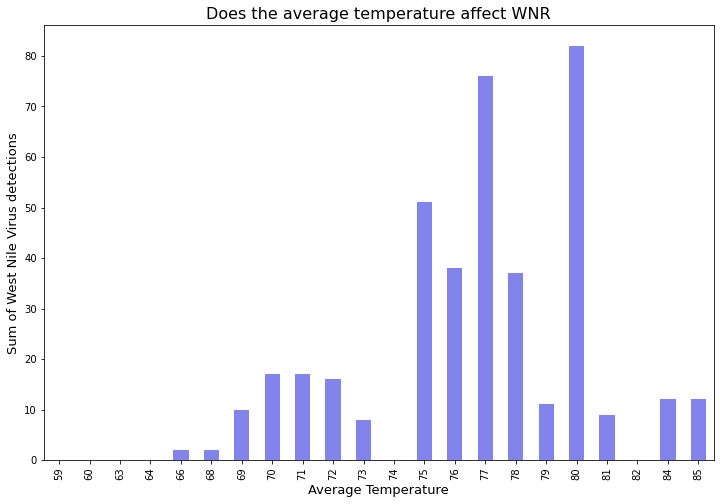

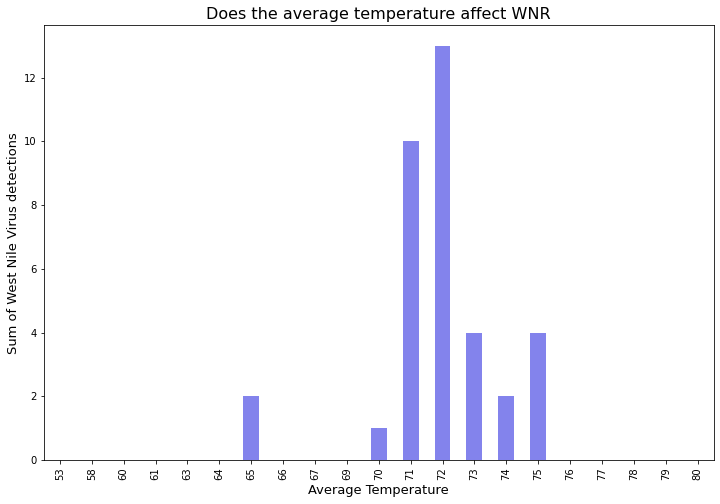

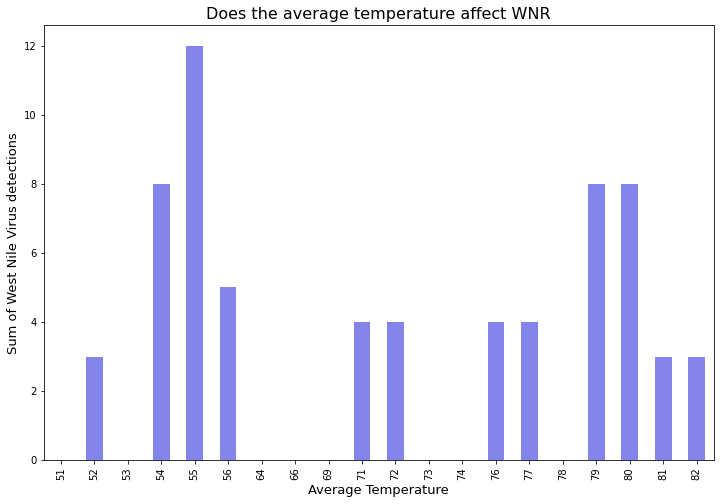

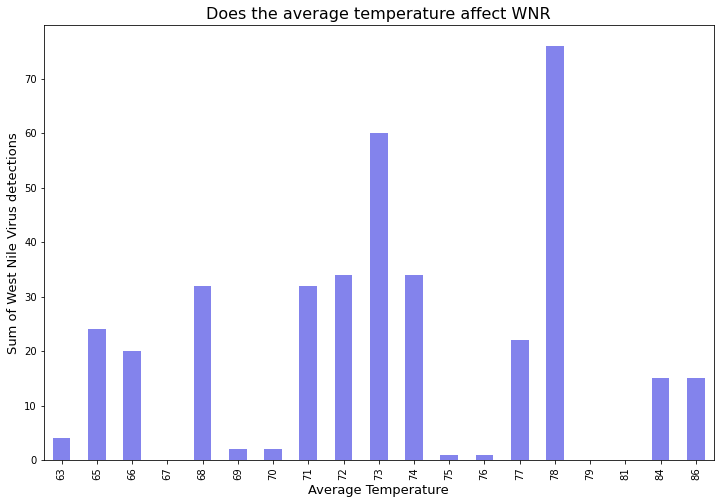

In [57]:
for x in train_weather['year'].unique():
    plt.figure(figsize=(12,8))
    train_weather[train_weather['year']==x].groupby(['tavg'])['wnvpresent'].sum().plot.bar(color='#8383EC') 
    plt.title("Does the average temperature affect WNR", fontsize=16)
    plt.xlabel("Average Temperature", fontsize =13)
    plt.xticks(rotation=90)
    plt.ylabel("Sum of West Nile Virus detections", fontsize=13)

/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);


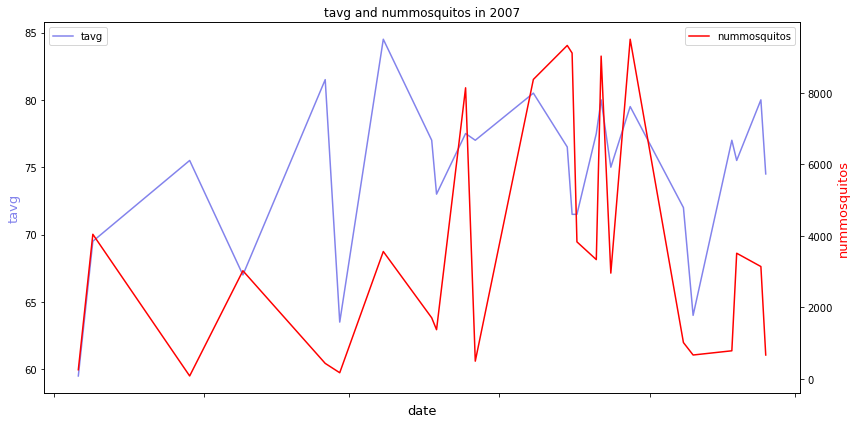

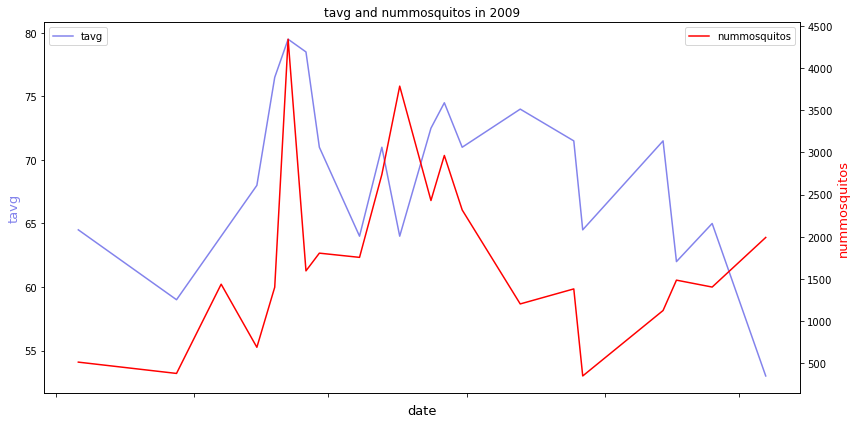

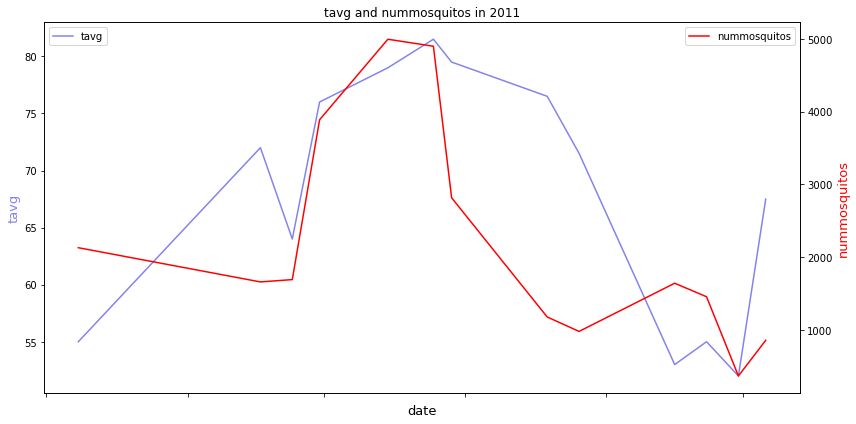

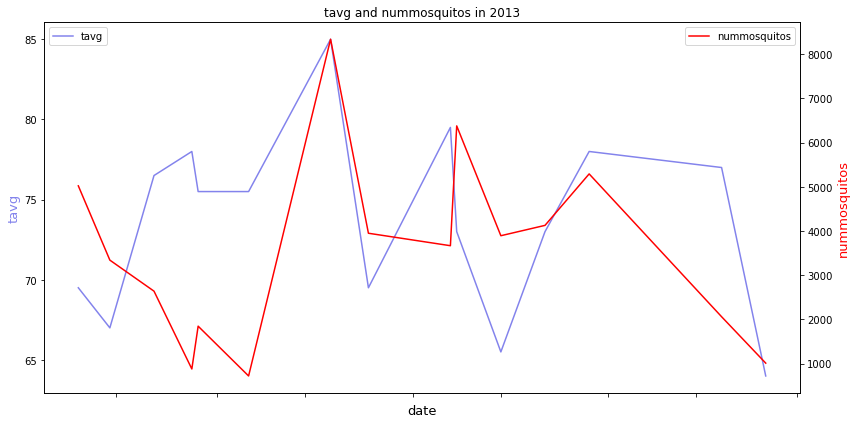

In [58]:
twin_plot('tavg','nummosquitos')

/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);
/var/folders/z8/t280f_1j6qs5z698810hhnnr0000gn/T/ipykernel_2123/1337156147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70);


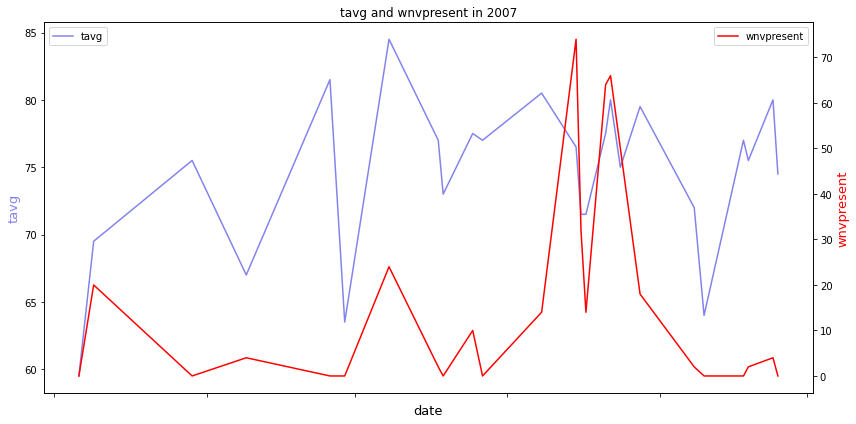

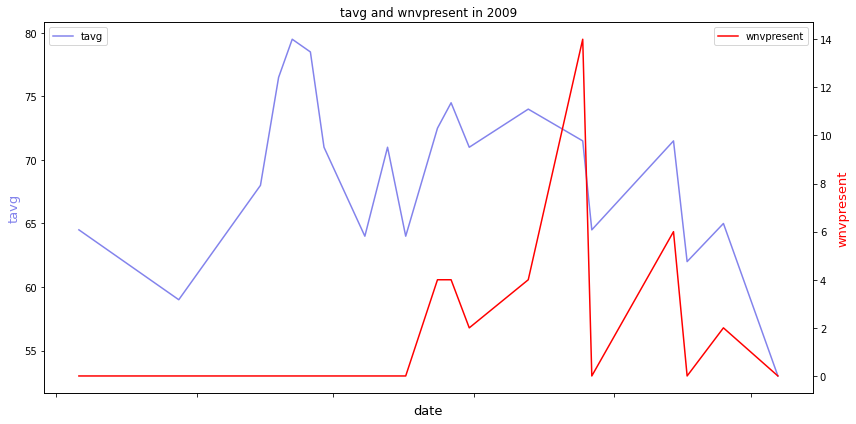

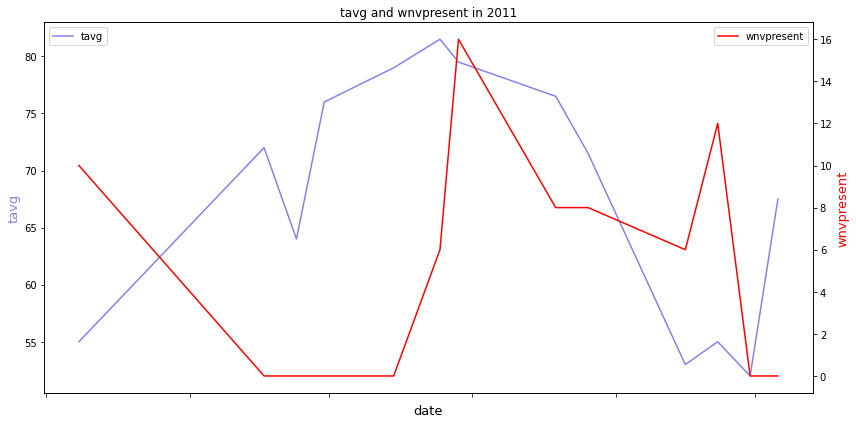

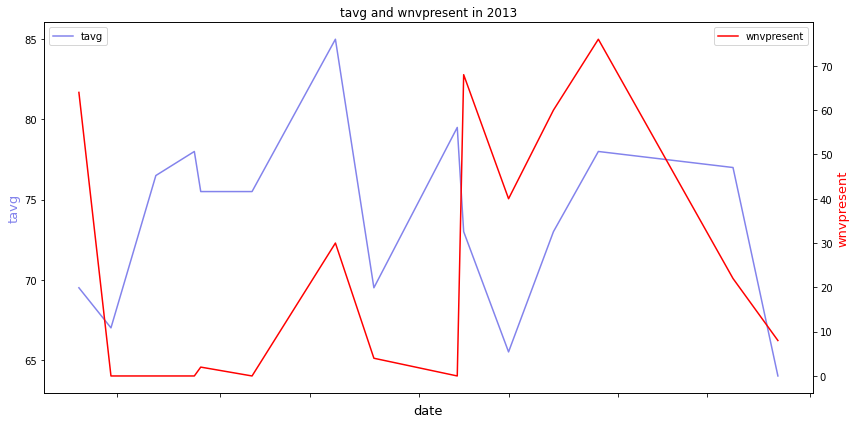

In [59]:
twin_plot('tavg','wnvpresent')

# Relationship between temperature against WNR:

There is some correlation between the counts of WNV-positive mosquitoes and the temperature charts.


From the above we can see that 4 peaks we see in the avg temp distribution was due to high temperatures in different years.

    2007 - The mean temp was between 75-80.
    2009 - The mean temp was between 65-70 and the peak hike was attained during 70-75 range.
    2011 - The mean temp was 75 but we could notice a small bump in the early 50-55 range as well.
    2013 - The max hike was obtained during 75-80 range.


This clarifies our stories in two ways:

1) As a result of increased mosquito activity brought on by warmer temperatures, more infections occur.

2) As mosquito reproduction and virus replication rates rise with temperature, there is a greater chance that the new generation of mosquitoes will be WNV-positive when they hatch. Because of this, in 2007 and 2011, each peak in the number of WNV-positive mosquitoes is followed by a subsequent peak, demonstrating that temperatures have an immediate as well as a delayed effect on the number of WNV-positive mosquitoes.



This is consistent with more WNV-positive mosquitoes being present when this temperature was reached during those times (as demarcated by the horizontal red lines).

Now we would like to check the effect of stagnant pressure and sealevel on WNR.

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

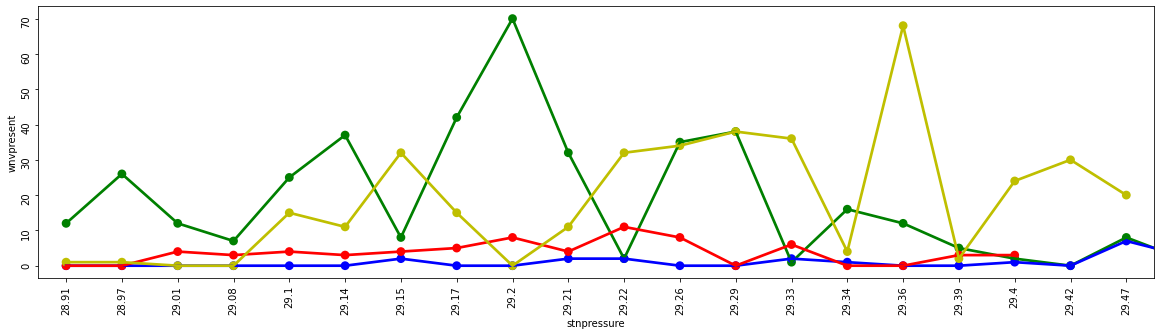

In [86]:
plt.figure(figsize=(20,5))
tmp = train_weather.groupby(['year','stnpressure'])['wnvpresent'].sum().reset_index()
sns.pointplot(tmp.loc[tmp['year']==2007,'stnpressure'],tmp['wnvpresent'],color='g')
sns.pointplot(tmp.loc[tmp['year']==2009,'stnpressure'],tmp['wnvpresent'],color='b')
sns.pointplot(tmp.loc[tmp['year']==2011,'stnpressure'],tmp['wnvpresent'],color='r')
sns.pointplot(tmp.loc[tmp['year']==2013,'stnpressure'],tmp['wnvpresent'],color='y')
plt.tick_params(rotation=90)
plt.show()

/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khooqixiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

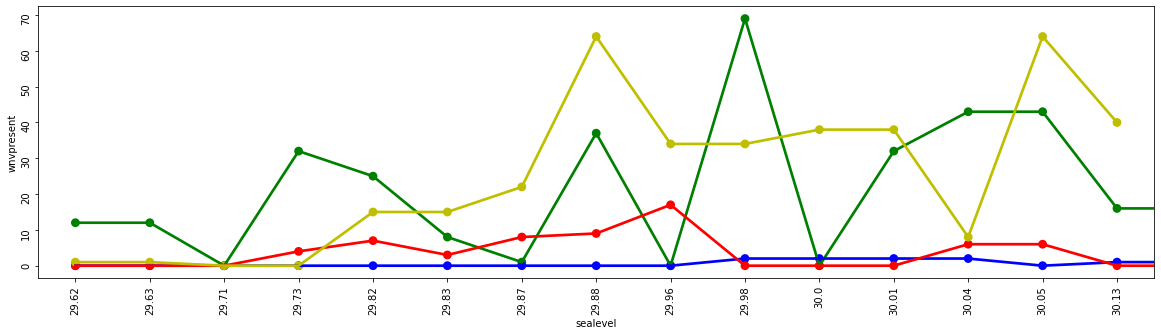

In [87]:
plt.figure(figsize=(20,5))
tmp = train_weather.groupby(['year','sealevel'])['wnvpresent'].sum().reset_index()
sns.pointplot(tmp.loc[tmp['year']==2007,'sealevel'],tmp['wnvpresent'],color='g')
sns.pointplot(tmp.loc[tmp['year']==2009,'sealevel'],tmp['wnvpresent'],color='b')
sns.pointplot(tmp.loc[tmp['year']==2011,'sealevel'],tmp['wnvpresent'],color='r')
sns.pointplot(tmp.loc[tmp['year']==2013,'sealevel'],tmp['wnvpresent'],color='y')
plt.tick_params(rotation=90)
plt.show()

# Relationship between Stagnant pressure,Sea level against WNR:

As we can see from the plots above, the Sea Level undoubtedly gives us an indication of Virus presence where the Sea Level pressure is lower, even though we were unable to draw any meaningful conclusions from the Stagnant pressure.


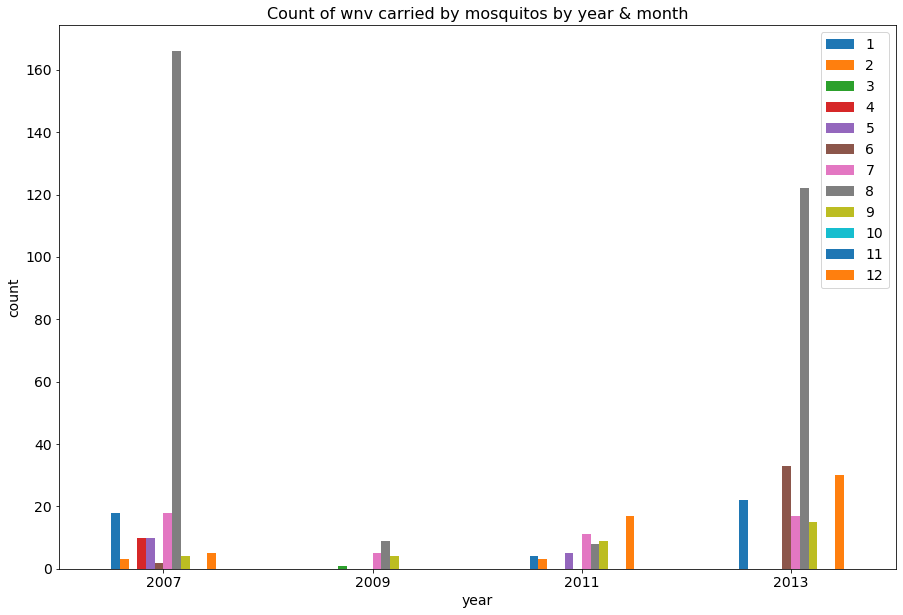

In [60]:
train1.groupby(['year','month'])['wnvpresent'].sum().unstack().plot.bar(figsize=(15,10))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Count of wnv carried by mosquitos by year & month', fontsize=16)
plt.ylabel('count', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.legend(fontsize=14)
plt.show()

We have noticed that December and August appear to have the largest concentrations of WNR.

The number of mosquitoes by species that are present would be shown below first by year and week, then by year and month.

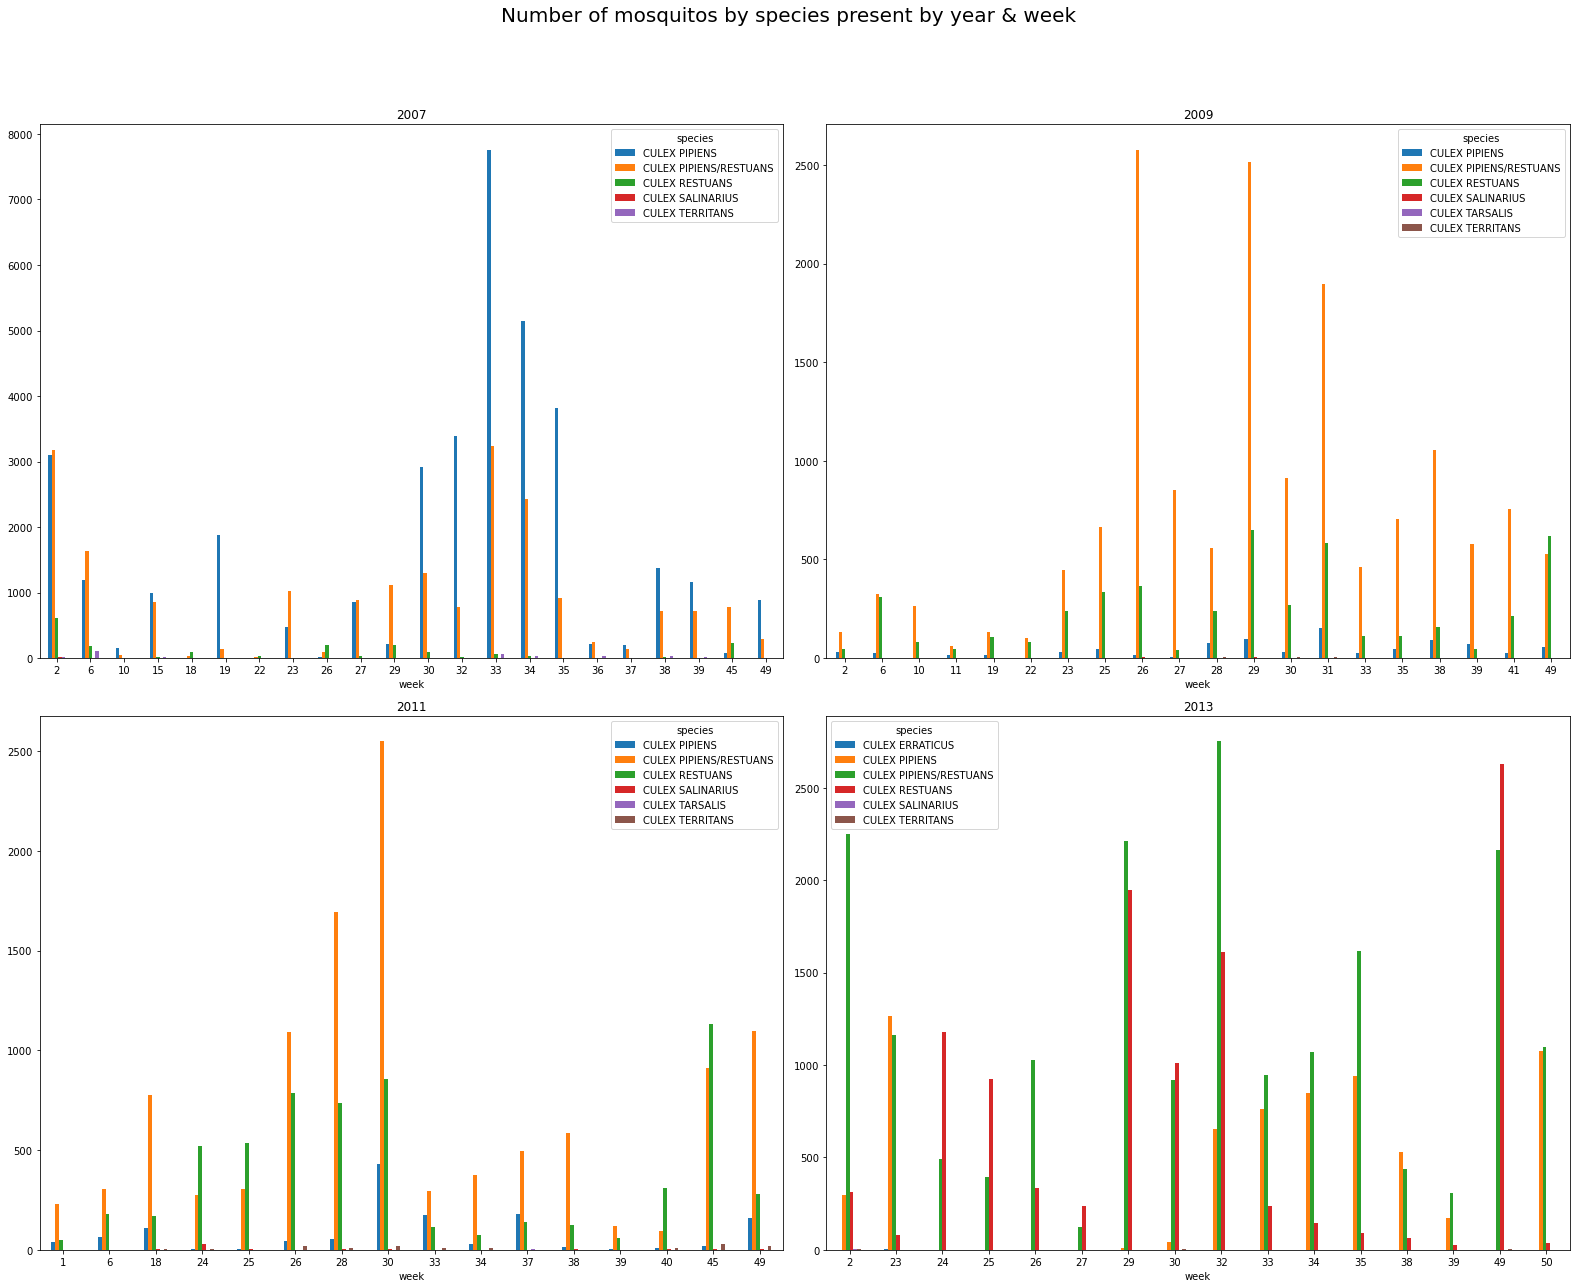

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22,17))
ax = ax.ravel()
plt.suptitle('Number of mosquitos by species present by year & week', fontsize=20, y=1.05)
for i, y in enumerate(train1['year'].unique()):
    train1[train1['year']==y].groupby(['week','species'])['nummosquitos'].sum().unstack(fill_value=0).plot.bar(ax=ax[i])
    ax[i].set_title(y)
    ax[i].tick_params(axis='x', labelrotation=0)
plt.tight_layout()

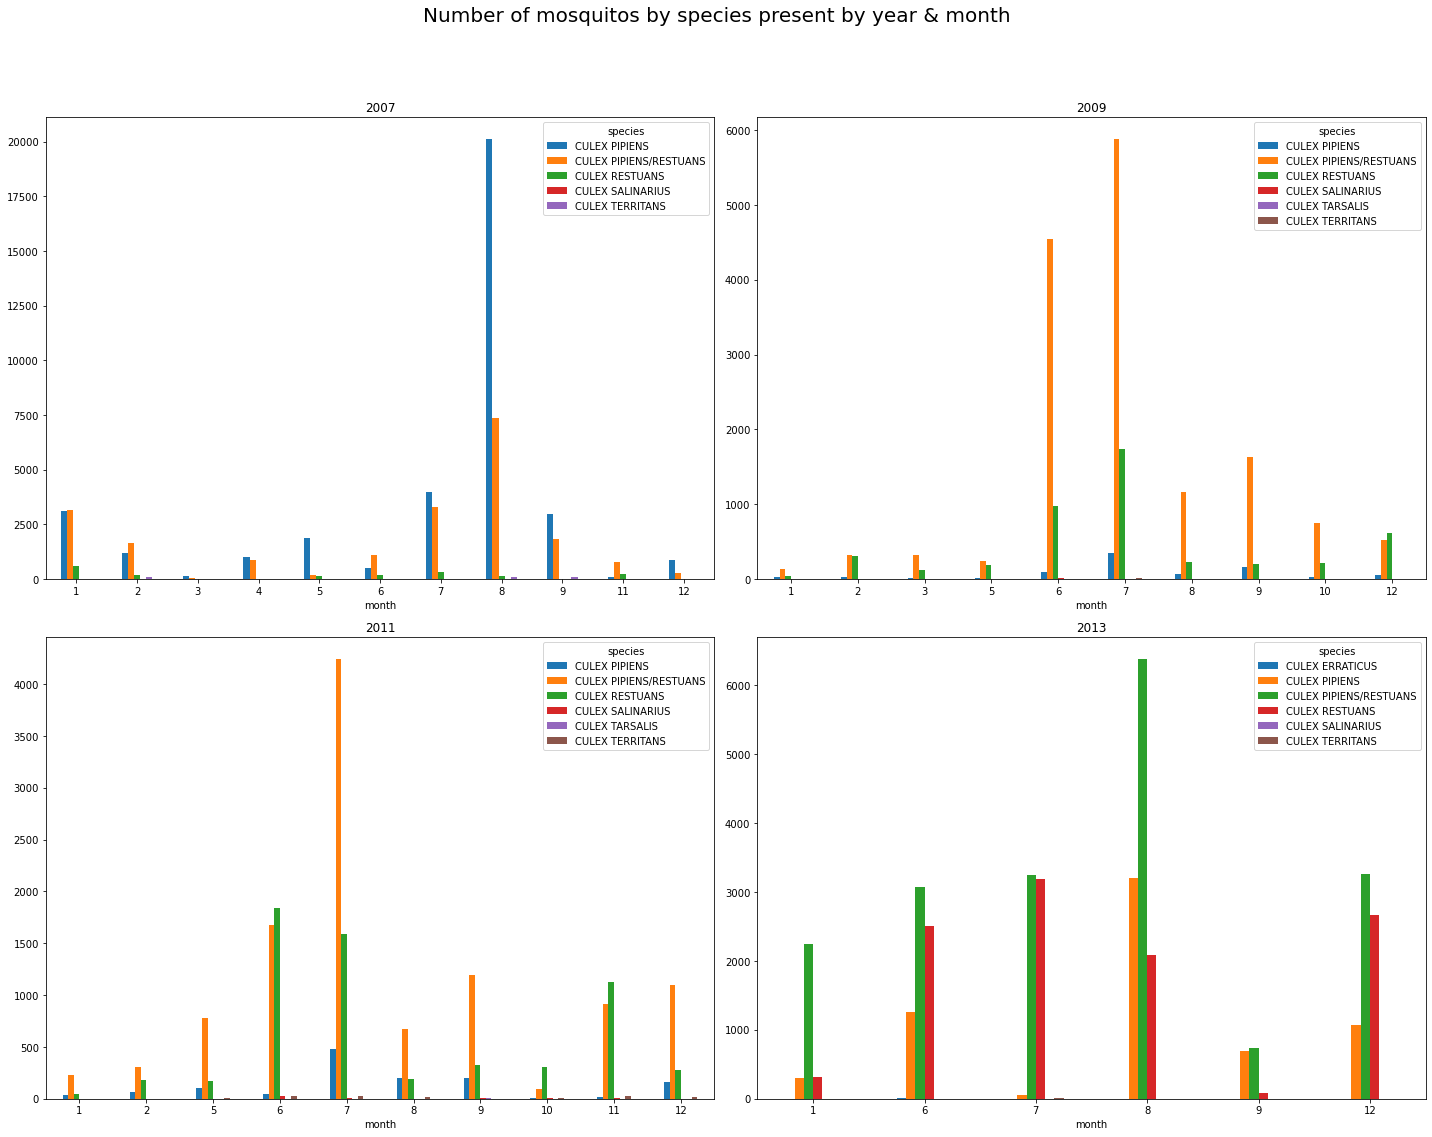

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
ax = ax.ravel()
plt.suptitle('Number of mosquitos by species present by year & month', fontsize=20, y=1.05)
for i, y in enumerate(train1['year'].unique()):
    train1[train1['year']==y].groupby(['month','species'])['nummosquitos'].sum().unstack(fill_value=0).plot.bar(ax=ax[i])
    ax[i].set_title(y)
    ax[i].tick_params(axis='x', labelrotation=0)
plt.tight_layout()

After identifying the species by month and week, we now wish to determine how many of these species are WNR.

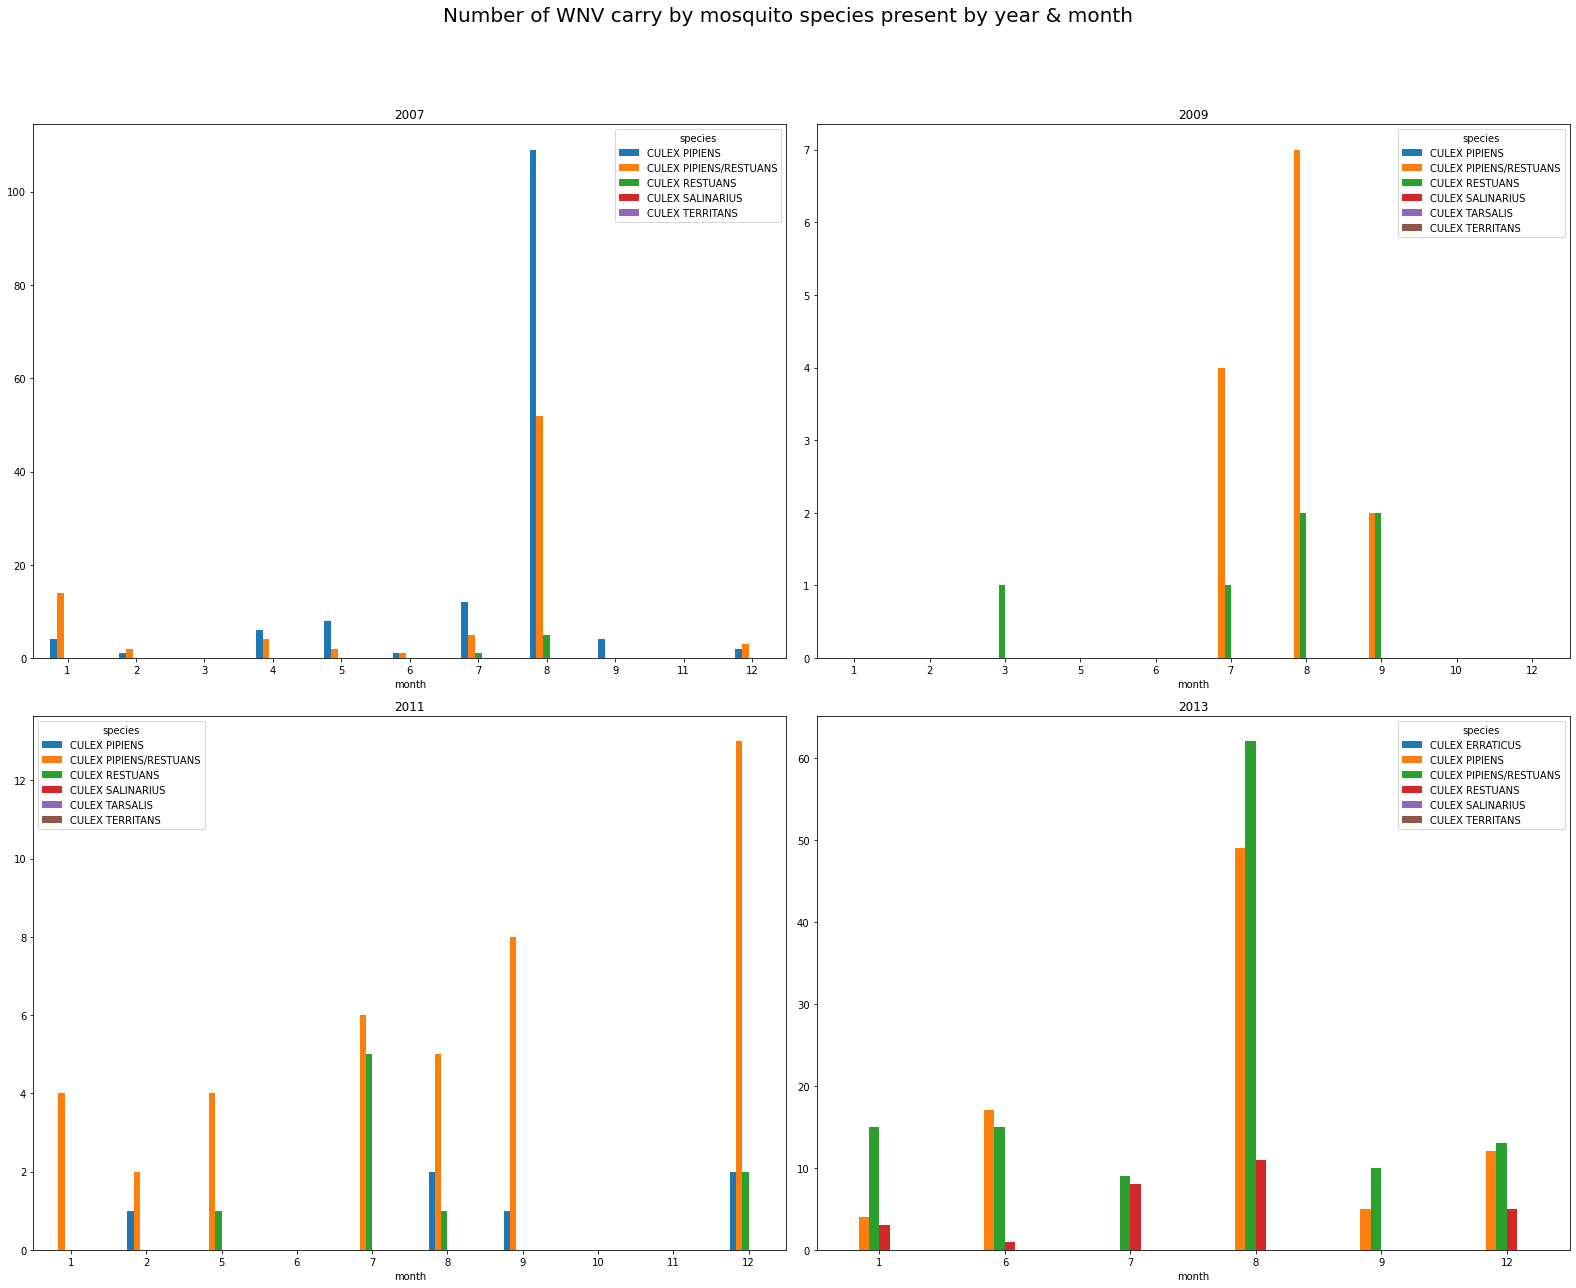

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22,17))
ax = ax.ravel()
plt.suptitle('Number of WNV carry by mosquito species present by year & month', fontsize=20, y=1.05)
for i, y in enumerate(train1['year'].unique()):
    train1[train1['year']==y].groupby(['month','species'])['wnvpresent'].sum().unstack(fill_value=0).plot.bar(ax=ax[i])
    ax[i].set_title(y)
    ax[i].tick_params(axis='x', labelrotation=0)
plt.tight_layout()

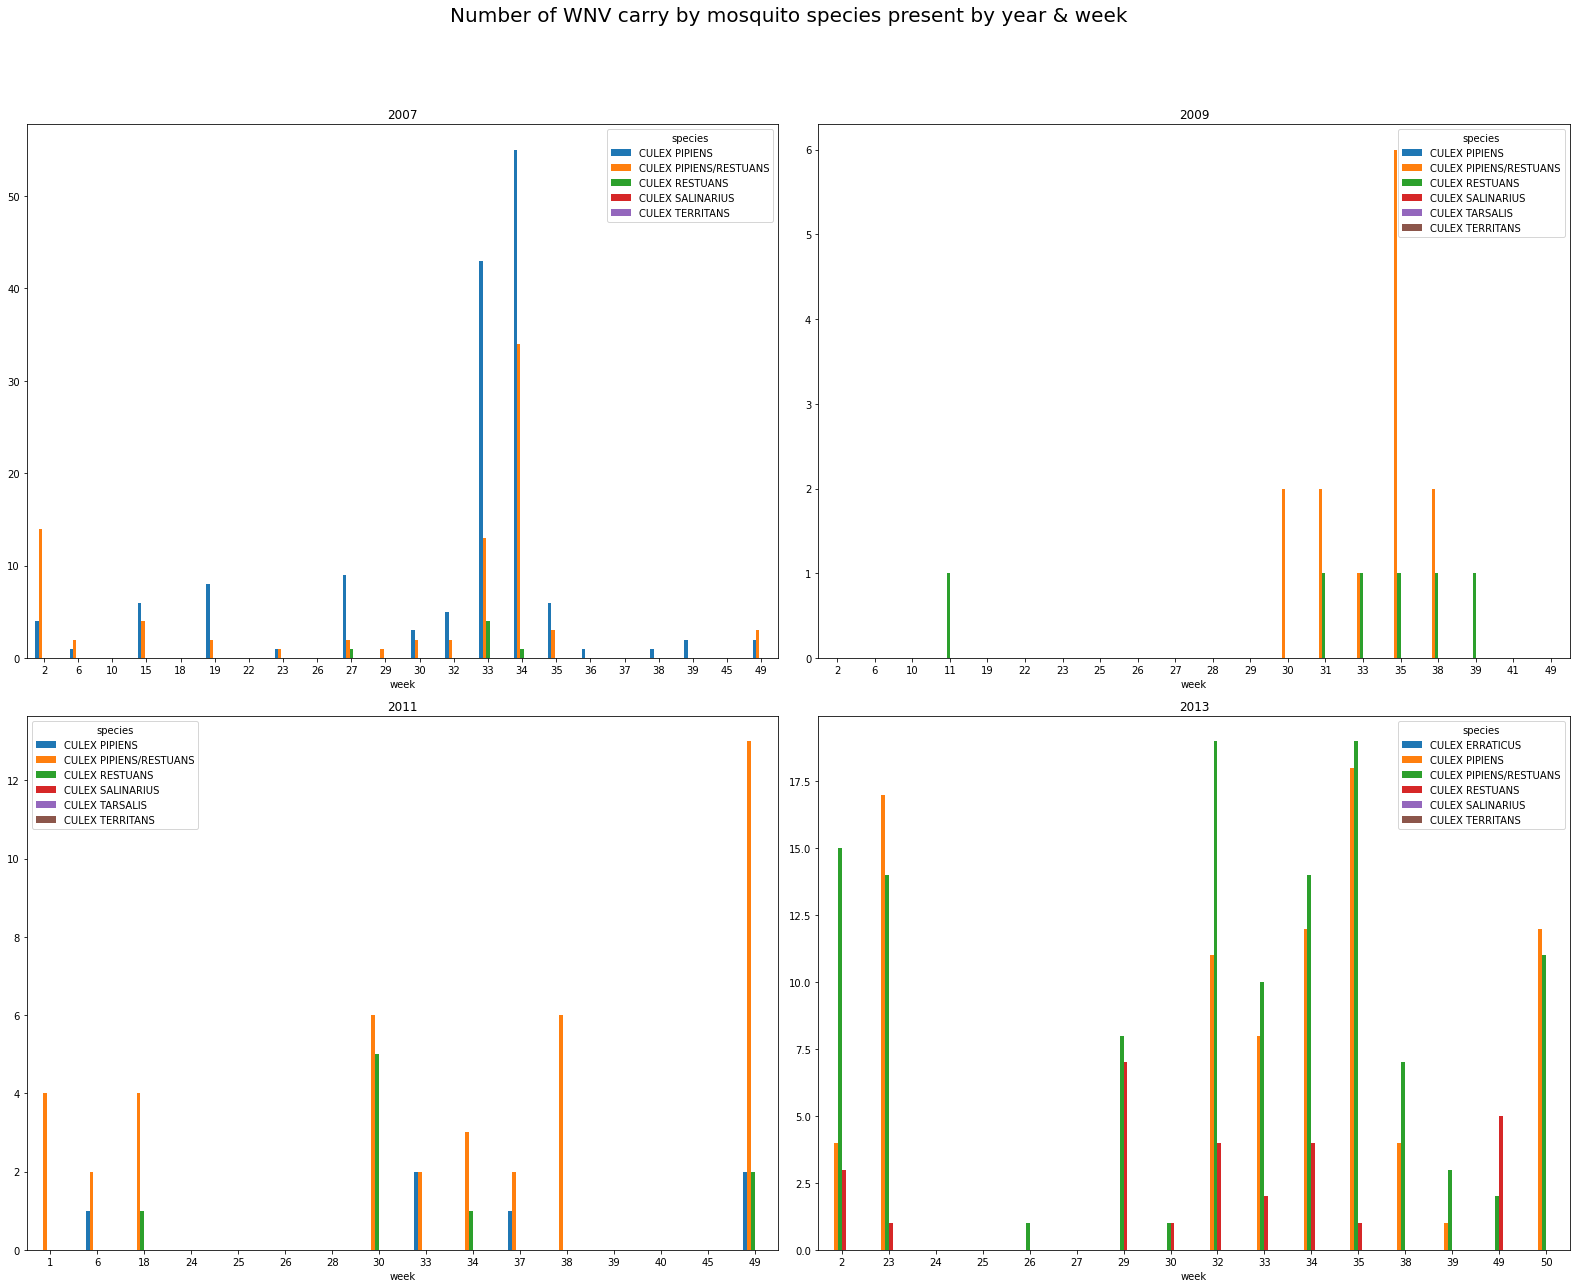

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22,17))
ax = ax.ravel()
plt.suptitle('Number of WNV carry by mosquito species present by year & week', fontsize=20, y=1.05)
for i, y in enumerate(train1['year'].unique()):
    train1[train1['year']==y].groupby(['week','species'])['wnvpresent'].sum().unstack(fill_value=0).plot.bar(ax=ax[i])
    ax[i].set_title(y)
    ax[i].tick_params(axis='x', labelrotation=0)
plt.tight_layout()

The graph above serves as additional confirmation of the pattern we were able to spot through our studies.

The months that are hotter and wetter in the environment are when you'll see a significant increase in mosquito activity. There is a higher likelihood that the next generation of mosquitoes will be WNV-positive when they hatch since mosquito reproduction and virus replication rates increase with temperature. Because of this, the number of WNV-positive insects peaked in 2007 and 2011, but each peak was followed by another peak, proving that temperatures have an immediate as well as a delayed effect on the number of WNV-positive mosquitoes.

Analysing Spray Efficacy:

We want to analyze the spray's impact to see if it slows the spread of mosquitoes.

In [68]:
spray1 = spray 

In [70]:
spray1.head()

Unnamed: 0   latitude  longitude            date_time
0           0  42.391623 -88.089163  2011-08-29 18:56:58
1           1  42.391348 -88.089163  2011-08-29 18:57:08
2           2  42.391022 -88.089157  2011-08-29 18:57:18
3           3  42.390637 -88.089158  2011-08-29 18:57:28
4           4  42.390410 -88.088858  2011-08-29 18:57:38

In [74]:
spray1['year'] = pd.to_datetime(spray1['date_time']).apply(lambda x: x.year)
spray1['week'] = pd.to_datetime(spray1['date_time']).apply(lambda x: x.week)

In [75]:
spray1.head()

latitude  longitude            date_time  year  week
0  42.391623 -88.089163  2011-08-29 18:56:58  2011    35
1  42.391348 -88.089163  2011-08-29 18:57:08  2011    35
2  42.391022 -88.089157  2011-08-29 18:57:18  2011    35
3  42.390637 -88.089158  2011-08-29 18:57:28  2011    35
4  42.390410 -88.088858  2011-08-29 18:57:38  2011    35

In [76]:
def target_plot(target, color):
    for year in [2011, 2013]:
        fig, ax1 = plt.subplots(figsize=(12,6))
        temp_df = train_weather[train_weather['year']==year].groupby(['week'])[target].sum().to_frame()

        sns.lineplot(x=temp_df.index, y=temp_df[target],
                     ci=None, color=color, label=f'{target}', ax=ax1)
        ax1.set_ylabel(f'{target}', fontsize=13)
        ax1.legend(loc=1)
        
        if year in spray1['year'].unique():
            for date in spray1[spray1['year'] == year].groupby('week').mean().index:
                plt.axvline(date, linestyle='--', color='black', alpha=0.5, label='Spray')
        
        plt.legend([f'{target}', 'spray1'])
        plt.title(f'{target} in {year}')
        plt.tight_layout()

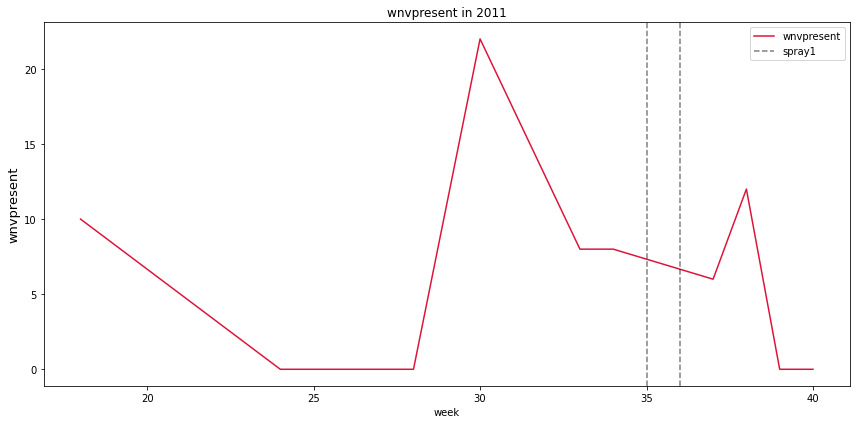

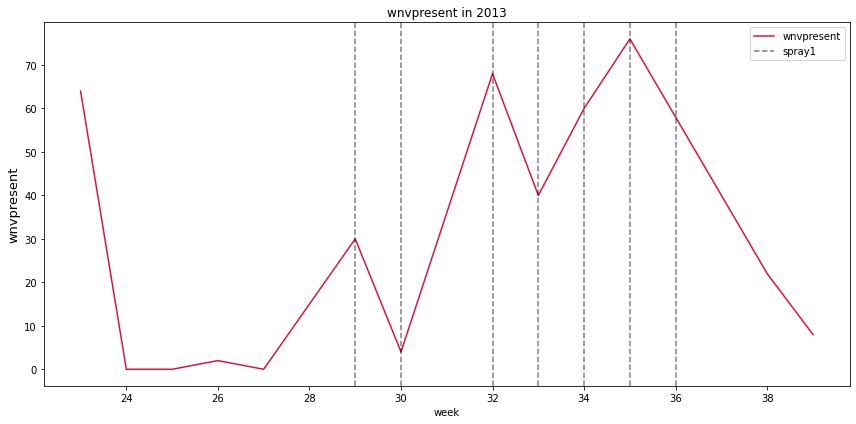

In [77]:
target_plot('wnvpresent', 'crimson')

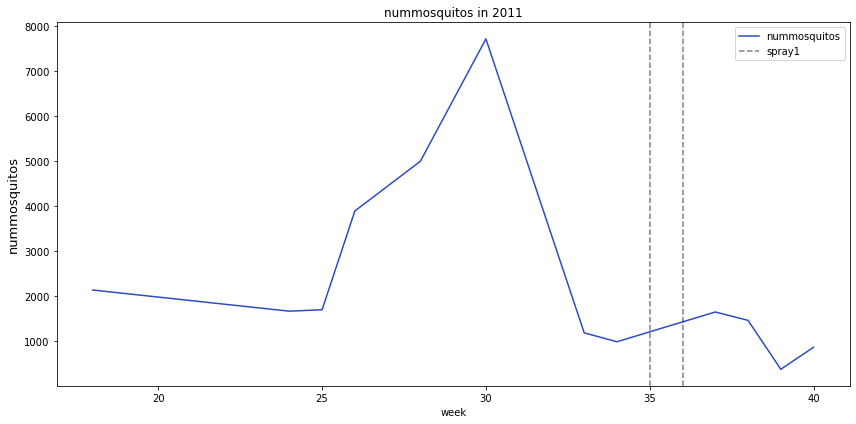

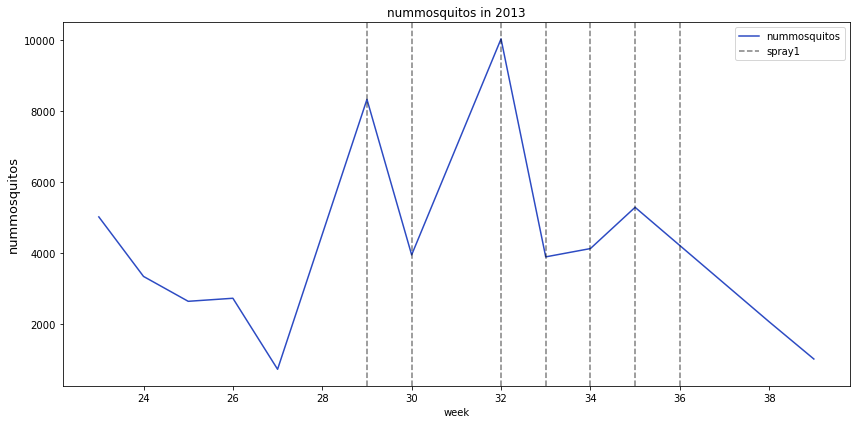

In [78]:
target_plot('nummosquitos', '#2d4bc3')

Since there were only two years during which spraying took place, our spray dataset is initially somewhat limited in its applicability. There were two days in 2011 when spraying was done. 
Spraying took place on 7 separate days in 2013 and was substantially more thorough. In general, it appears that spraying WnvPresent has no noticeable impact.


We can see from the two graphs above that spraying doesn't appear to have a direct or immediate impact on WNV identified in traps. These sprays don't seem to have much of an impact on the quantity of mosquitoes caught in traps.

We may exclude the spray data from our modeling because they are not available for the test data years (2008, 2010 and 2012) because the impact of the spraying on the WNV is minimal.

Now that we have done the Exploratory Data Analysis (EDA), we will move on to the feature engineering for the model.